# Predicting Learning Curves of Convolutional Neural Network on CIFAR10

In [41]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import tools as t
import models as m
import hyperband as hp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
configs,lcs,Y = t.load_data(scale_configs = True)
print("lcs:", lcs.shape, "configs:", configs.shape, "Y", Y.shape)

scaling configuration data
lcs: (265, 40, 1) configs: (265, 5) Y (265, 1)


###    Testing models (mlp, lstm, multi_lstm)

In [69]:
cfg = {'lr': 0.2213474827989724, 'batch_size': 20}
model = m.mlp(cfg)
m.train_mlp(model, configs, Y, cfg, split=177, epochs=10)
m.eval_mlp(model, configs, Y, split=177, batch_size=20)

Train on 177 samples, validate on 88 samples
Epoch 1/10
177/177 [==============================] - 2s 14ms/step - loss: 0.0554 - val_loss: 0.0263
Epoch 2/10
177/177 [==============================] - 0s 445us/step - loss: 0.0363 - val_loss: 0.0250
Epoch 3/10
177/177 [==============================] - 0s 446us/step - loss: 0.0353 - val_loss: 0.0234
Epoch 4/10
177/177 [==============================] - 0s 534us/step - loss: 0.0330 - val_loss: 0.0229
Epoch 5/10
177/177 [==============================] - 0s 443us/step - loss: 0.0305 - val_loss: 0.0252
Epoch 6/10
177/177 [==============================] - 0s 596us/step - loss: 0.0287 - val_loss: 0.0227
Epoch 7/10
177/177 [==============================] - 0s 431us/step - loss: 0.0260 - val_loss: 0.0192
Epoch 8/10
177/177 [==============================] - 0s 483us/step - loss: 0.0247 - val_loss: 0.0183
Epoch 9/10
177/177 [==============================] - 0s 683us/step - loss: 0.0224 - val_loss: 0.0185
Epoch 10/10
177/177 [=================

(0.020264899801071712, 0.017568055259537099)

In [52]:
model = m.multi_lstm()
print("lcs:", lcs.shape, "configs:", configs.shape, "Y", Y.shape)
# m.train_lstm(model, [configs,lcs], steps=(0,5), split=200, batch_size=20, epochs=20, mode = 'finalstep')
m.train_lstm(model, [configs,lcs], steps=(10,10), split=150, 
             batch_size=20, epochs=30, mode='finalstep', verbose=1)
m.eval_lstm_direct(model, [configs,lcs], Y, steps=10, split=150, batch_size=20)

lcs: (265, 40, 1) configs: (265, 5) Y (265, 1)
train considering 10 epochs, eval during training with 10 epochs
Epoch 1/30
8/8 [==============================] - 2s 283ms/step - loss: 0.3323 - mean_squared_error: 0.3323 - val_loss: 0.1488 - val_mean_squared_error: 0.1488
Epoch 2/30
8/8 [==============================] - 1s 90ms/step - loss: 0.1609 - mean_squared_error: 0.1609 - val_loss: 0.0304 - val_mean_squared_error: 0.0304
Epoch 3/30
8/8 [==============================] - 1s 94ms/step - loss: 0.0673 - mean_squared_error: 0.0673 - val_loss: 0.0540 - val_mean_squared_error: 0.0540
Epoch 4/30
8/8 [==============================] - 1s 97ms/step - loss: 0.0271 - mean_squared_error: 0.0271 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 5/30
8/8 [==============================] - 1s 101ms/step - loss: 0.0171 - mean_squared_error: 0.0171 - val_loss: 0.0207 - val_mean_squared_error: 0.0207
Epoch 6/30
8/8 [==============================] - 1s 100ms/step - loss: 0.0135 - mean_squar

(0.00087328647631683377, 0.001162902298025613)

In [54]:
# same with training on random lenghts
model = m.multi_lstm()
print("lcs:", lcs.shape, "configs:", configs.shape, "Y", Y.shape)
# m.train_lstm(model, [configs,lcs], steps=(0,5), split=200, batch_size=20, epochs=20, mode = 'finalstep')
m.train_lstm(model, [configs,lcs], steps=(0,10), split=150, batch_size=20, 
             epochs=30, mode='finalstep', verbose=1)
m.eval_lstm_direct(model, [configs,lcs], Y, steps=10, split=150, batch_size=20)

lcs: (265, 40, 1) configs: (265, 5) Y (265, 1)
train with random nr. of epochs, eval during training with 10 epochs
Epoch 1/30
8/8 [==============================] - 4s 451ms/step - loss: 0.2131 - mean_squared_error: 0.2131 - val_loss: 0.0756 - val_mean_squared_error: 0.0756
Epoch 2/30
8/8 [==============================] - 1s 186ms/step - loss: 0.0630 - mean_squared_error: 0.0630 - val_loss: 0.0521 - val_mean_squared_error: 0.0521
Epoch 3/30
8/8 [==============================] - 2s 201ms/step - loss: 0.0416 - mean_squared_error: 0.0416 - val_loss: 0.0282 - val_mean_squared_error: 0.0282
Epoch 4/30
8/8 [==============================] - 1s 187ms/step - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 5/30
8/8 [==============================] - 2s 189ms/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 6/30
8/8 [==============================] - 2s 190ms/step - loss: 0.0119 - mea

(0.0022836772330743558, 0.0023286114485302134)

In [80]:
model = m.multi_lstm()
print("lcs:", lcs.shape, "configs:", configs.shape, "Y", Y.shape)
# m.train_lstm(model, [configs,lcs], steps=(0,5), split=200, batch_size=20, epochs=20, mode = 'finalstep')
m.train_lstm(model, [configs,lcs], steps=(10,10), split=180, batch_size=20, 
             epochs=50, mode='nextstep', verbose=1)
m.eval_lstm_stepwise(model, [configs,lcs], Y, steps=10, split=180, batch_size=20)

lcs: (265, 40, 1) configs: (265, 5) Y (265, 1)
train on nextstep considering 10 epochs, eval during training with 10 epochs
Epoch 1/50
9/9 [==============================] - 5s 527ms/step - loss: 0.2842 - mean_squared_error: 0.2842 - val_loss: 0.1273 - val_mean_squared_error: 0.1273
Epoch 2/50
9/9 [==============================] - 1s 89ms/step - loss: 0.0610 - mean_squared_error: 0.0610 - val_loss: 0.0715 - val_mean_squared_error: 0.0715
Epoch 3/50
9/9 [==============================] - 1s 96ms/step - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 4/50
9/9 [==============================] - 1s 97ms/step - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.0223 - val_mean_squared_error: 0.0223
Epoch 5/50
9/9 [==============================] - 1s 97ms/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 6/50
9/9 [==============================] - 1s 100ms/step - loss: 0.0047 -

Epoch 48/50
9/9 [==============================] - 1s 92ms/step - loss: 7.4931e-04 - mean_squared_error: 7.4931e-04 - val_loss: 5.9438e-04 - val_mean_squared_error: 5.9438e-04
Epoch 49/50
9/9 [==============================] - 1s 101ms/step - loss: 6.7311e-04 - mean_squared_error: 6.7311e-04 - val_loss: 4.7425e-04 - val_mean_squared_error: 4.7425e-04
Epoch 50/50
9/9 [==============================] - 1s 112ms/step - loss: 6.5365e-04 - mean_squared_error: 6.5365e-04 - val_loss: 4.5641e-04 - val_mean_squared_error: 4.5641e-04
mse train: 0.06521, mse validation 0.02669


(0.065214293491303491, 0.026686737793762665)

In [78]:
model = m.multi_lstm()
print("lcs:", lcs.shape, "configs:", configs.shape, "Y", Y.shape)
# m.train_lstm(model, [configs,lcs], steps=(0,5), split=200, batch_size=20, epochs=20, mode = 'finalstep')
m.train_lstm(model, [configs,lcs], steps=(20,20), split=180, batch_size=20, 
             epochs=50, mode='nextstep', verbose=1)
m.eval_lstm_stepwise(model, [configs,lcs], Y, steps=20, split=180, batch_size=20)

lcs: (265, 40, 1) configs: (265, 5) Y (265, 1)
train considering 20 epochs, eval during training with 20 epochs
Epoch 1/50
9/9 [==============================] - 6s 616ms/step - loss: 0.3187 - mean_squared_error: 0.3187 - val_loss: 0.1667 - val_mean_squared_error: 0.1667
Epoch 2/50
9/9 [==============================] - 1s 144ms/step - loss: 0.0876 - mean_squared_error: 0.0876 - val_loss: 0.0497 - val_mean_squared_error: 0.0497
Epoch 3/50
9/9 [==============================] - 1s 139ms/step - loss: 0.0376 - mean_squared_error: 0.0376 - val_loss: 0.0228 - val_mean_squared_error: 0.0228
Epoch 4/50
9/9 [==============================] - 1s 146ms/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 5/50
9/9 [==============================] - 1s 157ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 6/50
9/9 [==============================] - 2s 171ms/step - loss: 0.0028 - mean_sq

Epoch 48/50
9/9 [==============================] - 1s 60ms/step - loss: 3.8044e-04 - mean_squared_error: 3.8044e-04 - val_loss: 5.9433e-04 - val_mean_squared_error: 5.9433e-04
Epoch 49/50
9/9 [==============================] - 1s 68ms/step - loss: 3.8620e-04 - mean_squared_error: 3.8620e-04 - val_loss: 3.8484e-04 - val_mean_squared_error: 3.8484e-04
Epoch 50/50
9/9 [==============================] - 1s 59ms/step - loss: 3.7075e-04 - mean_squared_error: 3.7075e-04 - val_loss: 5.0869e-04 - val_mean_squared_error: 5.0869e-04
mse train: 0.07631, mse validation 0.03996


(0.076310423364451249, 0.039959337114572585)

In [79]:
model = m.multi_lstm()
print("lcs:", lcs.shape, "configs:", configs.shape, "Y", Y.shape)
# m.train_lstm(model, [configs,lcs], steps=(0,5), split=200, batch_size=20, epochs=20, mode = 'finalstep')
m.train_lstm(model, [configs,lcs], steps=(5,5), split=180, batch_size=20, 
             epochs=50, mode='nextstep', verbose=1)
m.eval_lstm_stepwise(model, [configs,lcs], Y, steps=5, split=180, batch_size=20)

lcs: (265, 40, 1) configs: (265, 5) Y (265, 1)
train on nextstep considering 5 epochs, eval during training with 5 epochs
Epoch 1/50
9/9 [==============================] - 5s 510ms/step - loss: 0.2543 - mean_squared_error: 0.2543 - val_loss: 0.0632 - val_mean_squared_error: 0.0632
Epoch 2/50
9/9 [==============================] - 1s 59ms/step - loss: 0.0601 - mean_squared_error: 0.0601 - val_loss: 0.0636 - val_mean_squared_error: 0.0636
Epoch 3/50
9/9 [==============================] - 1s 66ms/step - loss: 0.0282 - mean_squared_error: 0.0282 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 4/50
9/9 [==============================] - 1s 67ms/step - loss: 0.0156 - mean_squared_error: 0.0156 - val_loss: 0.0060 - val_mean_squared_error: 0.0060
Epoch 5/50
9/9 [==============================] - 1s 69ms/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0057 - val_mean_squared_error: 0.0057
Epoch 6/50
9/9 [==============================] - 1s 67ms/step - loss: 0.0061 - me

Epoch 50/50
9/9 [==============================] - 1s 84ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 8.2414e-04 - val_mean_squared_error: 8.2414e-04
mse train: 7.22660, mse validation 7.20777


(7.2265960036872281, 7.2077733345183974)

In [57]:
model = m.multi_lstm()
print("lcs:", lcs.shape, "configs:", configs.shape, "Y", Y.shape)
# m.train_lstm(model, [configs,lcs], steps=(0,5), split=200, batch_size=20, epochs=20, mode = 'finalstep')
m.train_lstm(model, [configs,lcs], steps=(0,10), split=150, batch_size=20, 
             epochs=10, mode='nextstep', verbose=1)
m.eval_lstm_stepwise(model, [configs,lcs], Y, steps=10, split=150, batch_size=20)

lcs: (265, 40, 1) configs: (265, 5) Y (265, 1)
train with random nr. of epochs, eval during training with 10 epochs
Epoch 1/10
8/8 [==============================] - 4s 489ms/step - loss: 0.2961 - mean_squared_error: 0.2961 - val_loss: 0.0789 - val_mean_squared_error: 0.0789
Epoch 2/10
8/8 [==============================] - 1s 185ms/step - loss: 0.0863 - mean_squared_error: 0.0863 - val_loss: 0.0419 - val_mean_squared_error: 0.0419
Epoch 3/10
8/8 [==============================] - 2s 202ms/step - loss: 0.0455 - mean_squared_error: 0.0455 - val_loss: 0.0362 - val_mean_squared_error: 0.0362
Epoch 4/10
8/8 [==============================] - 1s 187ms/step - loss: 0.0180 - mean_squared_error: 0.0180 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 5/10
8/8 [==============================] - 2s 189ms/step - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 6/10
8/8 [==============================] - 2s 190ms/step - loss: 0.0077 - mea

(0.92658545341745213, 0.73805311720421751)

In [49]:
cfg = {'maxdepth': 10, 'lr': 0.08119864140758115, 'gamma': 0.007833441242813044, 
       'cols_bt': 0.9376450587145334, 'n_estimators': 1000, 'subsample': 0.7946631901813815}
model = m.xgb_next(cfg)
m.train_xgb_next(model, [configs,lcs], split = 200)
m.eval_xgb_stepwise(model, [configs,lcs], Y, 10, split=200)

train on new epoch 5 true value for curve no. 13 (example) 0.297987927284
train on new epoch 6 true value for curve no. 13 (example) 0.276659959129
train on new epoch 7 true value for curve no. 13 (example) 0.275050303766
train on new epoch 8 true value for curve no. 13 (example) 0.288933598569
train on new epoch 9 true value for curve no. 13 (example) 0.275251509888
train on new epoch 10 true value for curve no. 13 (example) 0.311066399728
train on new epoch 11 true value for curve no. 13 (example) 0.257645875216
train on new epoch 12 true value for curve no. 13 (example) 0.26348088256
train on new epoch 13 true value for curve no. 13 (example) 0.282394366605
train on new epoch 14 true value for curve no. 13 (example) 0.245372237904
train on new epoch 15 true value for curve no. 13 (example) 0.252716300743
train on new epoch 16 true value for curve no. 13 (example) 0.246177060263
train on new epoch 17 true value for curve no. 13 (example) 0.235714284437
train on new epoch 18 true valu

(0.083146945607023348, 0.056170584855359744)

###    evaluating models with cross validation (ridge, XGB, mlp, lstm, multi_lstm)

cross validate 0 epochs, train on 0 steps, validate on [0] steps
config {'alpha': 1.0}
train fold 1 on 0 steps, validation on 0 steps
train fold 2 on 0 steps, validation on 0 steps
train fold 3 on 0 steps, validation on 0 steps
MSE on validation data on [0] steps: means over folds: *** [ 0.02977] ***
Results validation data of all Folds: 
[[ 0.03703]
 [ 0.02671]
 [ 0.02556]]
MSE on train data on [0] steps: means over folds: *** [ 0.02747] ***
Results training data of all Folds: 
[[ 0.02433]
 [ 0.02864]
 [ 0.02943]]
mse over all validation data 0.0297968665436


/home/jochen/.local/lib/python3.5/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


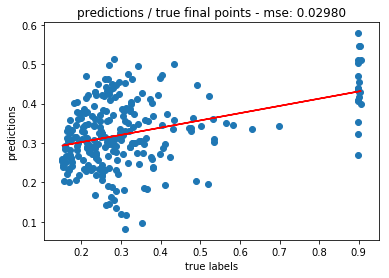

In [127]:
cfg={'alpha':1.0}
res = m.eval_cv('ridge', configs, Y, cfg=cfg, splits = 3)
t.scatter_plot(Y, res['y_pred'], res['mse'], 'ridge regression')

cross validate 0 epochs, train on 0 steps, validate on [0] steps
config {'lr': 0.08119864140758115, 'subsample': 0.7946631901813815, 'n_estimators': 1000, 'gamma': 0.007833441242813044, 'maxdepth': 10, 'cols_bt': 0.9376450587145334}
train fold 1 on 0 steps, validation on 0 steps
train fold 2 on 0 steps, validation on 0 steps
train fold 3 on 0 steps, validation on 0 steps
MSE on validation data on [0] steps: means over folds: *** [ 0.00728] ***
Results validation data of all Folds: 
[[ 0.00881]
 [ 0.00549]
 [ 0.00753]]
MSE on train data on [0] steps: means over folds: *** [ 0.00059] ***
Results training data of all Folds: 
[[ 0.00053]
 [ 0.00061]
 [ 0.00062]]
mse over all validation data 0.00728375623487


/home/jochen/.local/lib/python3.5/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


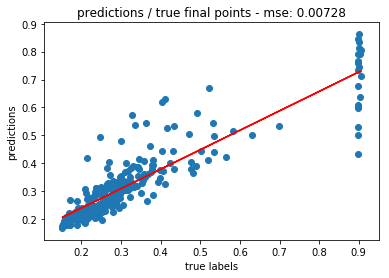

In [128]:
cfg = {'maxdepth': 10, 'lr': 0.08119864140758115, 'gamma': 0.007833441242813044, 'cols_bt': 0.9376450587145334, 
       'n_estimators': 1000, 'subsample': 0.7946631901813815}
#cfg = {'maxdepth': 4, 'lr': 0.07120217610550672, 'gamma': 0.03393596760993278, 'cols_bt': 0.823494199726015, 'n_estimators': 107, 'subsample': 0.7288741544938715}
res = m.eval_cv('xgb', configs, Y, cfg=cfg, splits = 3)
t.scatter_plot(Y, res['y_pred'], res['mse'], 'xgb')

cross validate 500 epochs, train on 0 steps, validate on [0] steps
config {'lr': 0.2213474827989724, 'batch_size': 20}
train fold 1 on 0 steps, validation on 0 steps
train fold 2 on 0 steps, validation on 0 steps
train fold 3 on 0 steps, validation on 0 steps
MSE on validation data on [0] steps: means over folds: *** [ 0.00601] ***
Results validation data of all Folds: 
[[ 0.00614]
 [ 0.00569]
 [ 0.0062 ]]
MSE on train data on [0] steps: means over folds: *** [ 0.00051] ***
Results training data of all Folds: 
[[ 0.00019]
 [ 0.00076]
 [ 0.00056]]
mse over all validation data 0.00601034541179


/home/jochen/.local/lib/python3.5/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


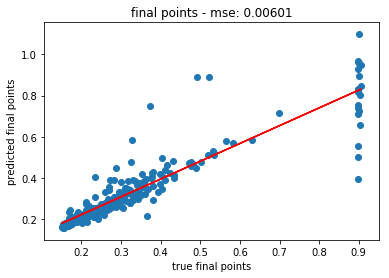

In [129]:
# evaluate mlp via cross validation
cfg = {'lr': 0.2213474827989724, 'batch_size': 20} 
res = m.eval_cv('mlp', configs, Y, cfg=cfg, epochs=500, splits = 3, earlystop=False) 
t.scatter_plot(Y, res['y_pred'], res['mse'], 'mlp 500 epochs')

In [62]:
# evaluate mlp via cross validation
cfg = {'lr': 0.2213474827989724, 'batch_size': 20} 
m.eval_cv('mlp', configs, Y, cfg=cfg, epochs=1000, splits = 3, earlystop=True)
t.scatter_plot(Y, res['y_pred'], res['mse'], 'mlp earlystop')

cross validate 1000 epochs, train on 5 steps, validate on [5] steps
config {'lr': 0.2213474827989724, 'batch_size': 20, 'k_exp': 0.005043479631870928}
choose min as mode
evaluating with early stopping
train fold 1 on 5 steps, validation on 5 steps

Epoch 00001: val_loss improved from inf to 0.04596, storing weights.

Epoch 00002: val_loss improved from 0.04596 to 0.04550, storing weights.

Epoch 00003: val_loss is 0.04579, did not improve

Epoch 00004: val_loss improved from 0.04550 to 0.04279, storing weights.

Epoch 00005: val_loss improved from 0.04279 to 0.04151, storing weights.

Epoch 00006: val_loss is 0.04443, did not improve

Epoch 00007: val_loss improved from 0.04151 to 0.03859, storing weights.

Epoch 00008: val_loss improved from 0.03859 to 0.03638, storing weights.

Epoch 00009: val_loss improved from 0.03638 to 0.03513, storing weights.

Epoch 00010: val_loss improved from 0.03513 to 0.03436, storing weights.

Epoch 00011: val_loss improved from 0.03436 to 0.02978, stori

Epoch 00142: val_loss is 0.00753, did not improve

Epoch 00143: val_loss is 0.00788, did not improve

Epoch 00144: val_loss improved from 0.00739 to 0.00734, storing weights.

Epoch 00145: val_loss is 0.00746, did not improve

Epoch 00146: val_loss is 0.00736, did not improve

Epoch 00147: val_loss is 0.00738, did not improve

Epoch 00148: val_loss is 0.00862, did not improve

Epoch 00149: val_loss is 0.00750, did not improve

Epoch 00150: val_loss is 0.00770, did not improve

Epoch 00151: val_loss is 0.00770, did not improve

Epoch 00152: val_loss is 0.00757, did not improve

Epoch 00153: val_loss is 0.00746, did not improve

Epoch 00154: val_loss is 0.00741, did not improve

Epoch 00155: val_loss is 0.00745, did not improve

Epoch 00156: val_loss is 0.00749, did not improve

Epoch 00157: val_loss is 0.00736, did not improve

Epoch 00158: val_loss is 0.00830, did not improve

Epoch 00159: val_loss improved from 0.00734 to 0.00728, storing weights.

Epoch 00160: val_loss improved from 


Epoch 00053: val_loss is 0.00617, did not improve

Epoch 00054: val_loss is 0.00710, did not improve

Epoch 00055: val_loss is 0.00641, did not improve

Epoch 00056: val_loss improved from 0.00611 to 0.00603, storing weights.

Epoch 00057: val_loss is 0.00627, did not improve

Epoch 00058: val_loss is 0.00815, did not improve

Epoch 00059: val_loss is 0.00682, did not improve

Epoch 00060: val_loss is 0.00606, did not improve

Epoch 00061: val_loss improved from 0.00603 to 0.00593, storing weights.

Epoch 00062: val_loss is 0.00742, did not improve

Epoch 00063: val_loss is 0.00688, did not improve

Epoch 00064: val_loss is 0.00628, did not improve

Epoch 00065: val_loss is 0.00700, did not improve

Epoch 00066: val_loss improved from 0.00593 to 0.00587, storing weights.

Epoch 00067: val_loss improved from 0.00587 to 0.00580, storing weights.

Epoch 00068: val_loss is 0.00623, did not improve

Epoch 00069: val_loss is 0.00626, did not improve

Epoch 00070: val_loss is 0.00589, did no


Epoch 00211: val_loss is 0.00574, did not improve

Epoch 00212: val_loss is 0.00549, did not improve

Epoch 00213: val_loss is 0.00596, did not improve

Epoch 00214: val_loss is 0.00704, did not improve

Epoch 00215: val_loss is 0.00567, did not improve

Epoch 00216: val_loss is 0.00585, did not improve

Epoch 00217: val_loss is 0.00551, did not improve

Epoch 00218: val_loss is 0.00572, did not improve

Epoch 00219: val_loss is 0.00604, did not improve

Epoch 00220: val_loss is 0.00566, did not improve

Epoch 00221: val_loss is 0.00577, did not improve

Epoch 00222: val_loss is 0.00562, did not improve

Epoch 00223: val_loss is 0.00549, did not improve

Epoch 00224: val_loss is 0.00678, did not improve

Epoch 00225: val_loss is 0.00572, did not improve

Epoch 00226: val_loss is 0.00570, did not improve

Epoch 00227: val_loss is 0.00655, did not improve

Epoch 00228: val_loss is 0.00642, did not improve

Epoch 00229: val_loss is 0.00576, did not improve

Epoch 00230: val_loss is 0.005


Epoch 00376: val_loss is 0.00569, did not improve

Epoch 00377: val_loss is 0.00583, did not improve

Epoch 00378: val_loss is 0.00649, did not improve

Epoch 00379: val_loss is 0.00588, did not improve

Epoch 00380: val_loss is 0.00563, did not improve

Epoch 00381: val_loss is 0.00554, did not improve

Epoch 00382: val_loss is 0.00573, did not improve

Epoch 00383: val_loss is 0.00586, did not improve

Epoch 00384: val_loss is 0.00573, did not improve

Epoch 00385: val_loss is 0.00580, did not improve

Epoch 00386: val_loss is 0.00551, did not improve

Epoch 00387: val_loss is 0.00576, did not improve

Epoch 00388: val_loss is 0.00586, did not improve

Epoch 00389: val_loss is 0.00575, did not improve

Epoch 00390: val_loss is 0.00569, did not improve

Epoch 00391: val_loss is 0.00569, did not improve

Epoch 00392: val_loss is 0.00618, did not improve

Epoch 00393: val_loss is 0.00564, did not improve

Epoch 00394: val_loss is 0.00570, did not improve

Epoch 00395: val_loss is 0.005


Epoch 00100: val_loss is 0.00620, did not improve

Epoch 00101: val_loss is 0.00646, did not improve

Epoch 00102: val_loss is 0.00590, did not improve

Epoch 00103: val_loss is 0.00596, did not improve

Epoch 00104: val_loss improved from 0.00553 to 0.00511, storing weights.

Epoch 00105: val_loss is 0.00673, did not improve

Epoch 00106: val_loss is 0.00579, did not improve

Epoch 00107: val_loss is 0.00573, did not improve

Epoch 00108: val_loss is 0.00566, did not improve

Epoch 00109: val_loss is 0.00599, did not improve

Epoch 00110: val_loss is 0.00554, did not improve

Epoch 00111: val_loss is 0.00678, did not improve

Epoch 00112: val_loss is 0.00597, did not improve

Epoch 00113: val_loss is 0.00771, did not improve

Epoch 00114: val_loss is 0.00612, did not improve

Epoch 00115: val_loss is 0.00628, did not improve

Epoch 00116: val_loss is 0.00592, did not improve

Epoch 00117: val_loss is 0.00575, did not improve

Epoch 00118: val_loss is 0.00698, did not improve

Epoch 0

In [63]:
# evaluate mlp via cross validation
cfg = {'lr': 0.2213474827989724, 'batch_size': 20} 
m.eval_cv('mlp', configs, Y, cfg=cfg, epochs=1000, splits = 3, earlystop=True, dropout=True)

cross validate 1000 epochs, train on 5 steps, validate on [5] steps
config {'lr': 0.2213474827989724, 'batch_size': 20, 'k_exp': 0.005043479631870928}
choose min as mode
evaluating with early stopping
create mlp using Dropout
train fold 1 on 5 steps, validation on 5 steps

Epoch 00001: val_loss improved from inf to 0.04859, storing weights.

Epoch 00002: val_loss improved from 0.04859 to 0.04643, storing weights.

Epoch 00003: val_loss is 0.04711, did not improve

Epoch 00004: val_loss improved from 0.04643 to 0.04581, storing weights.

Epoch 00005: val_loss is 0.04680, did not improve

Epoch 00006: val_loss improved from 0.04581 to 0.04379, storing weights.

Epoch 00007: val_loss improved from 0.04379 to 0.04234, storing weights.

Epoch 00008: val_loss is 0.04240, did not improve

Epoch 00009: val_loss improved from 0.04234 to 0.03941, storing weights.

Epoch 00010: val_loss improved from 0.03941 to 0.03765, storing weights.

Epoch 00011: val_loss is 0.03908, did not improve

Epoch 00


Epoch 00141: val_loss is 0.00821, did not improve

Epoch 00142: val_loss is 0.01001, did not improve

Epoch 00143: val_loss is 0.00877, did not improve

Epoch 00144: val_loss is 0.01125, did not improve

Epoch 00145: val_loss is 0.00941, did not improve

Epoch 00146: val_loss improved from 0.00778 to 0.00776, storing weights.

Epoch 00147: val_loss is 0.00791, did not improve

Epoch 00148: val_loss is 0.00816, did not improve

Epoch 00149: val_loss is 0.00807, did not improve

Epoch 00150: val_loss improved from 0.00776 to 0.00744, storing weights.

Epoch 00151: val_loss is 0.00927, did not improve

Epoch 00152: val_loss is 0.00812, did not improve

Epoch 00153: val_loss is 0.00853, did not improve

Epoch 00154: val_loss is 0.00826, did not improve

Epoch 00155: val_loss is 0.00865, did not improve

Epoch 00156: val_loss is 0.00923, did not improve

Epoch 00157: val_loss is 0.00842, did not improve

Epoch 00158: val_loss is 0.00913, did not improve

Epoch 00159: val_loss is 0.00798, d


Epoch 00300: val_loss is 0.00843, did not improve

Epoch 00301: val_loss is 0.00729, did not improve

Epoch 00302: val_loss is 0.00681, did not improve

Epoch 00303: val_loss is 0.00817, did not improve

Epoch 00304: val_loss is 0.00785, did not improve

Epoch 00305: val_loss is 0.00915, did not improve

Epoch 00306: val_loss is 0.00756, did not improve

Epoch 00307: val_loss is 0.01090, did not improve

Epoch 00308: val_loss is 0.00912, did not improve

Epoch 00309: val_loss is 0.01011, did not improve

Epoch 00310: val_loss is 0.01087, did not improve

Epoch 00311: val_loss is 0.00807, did not improve

Epoch 00312: val_loss is 0.01049, did not improve

Epoch 00313: val_loss is 0.00785, did not improve

Epoch 00314: val_loss is 0.00983, did not improve

Epoch 00315: val_loss is 0.00713, did not improve

Epoch 00316: val_loss is 0.00977, did not improve

Epoch 00317: val_loss is 0.00738, did not improve

Epoch 00318: val_loss is 0.00823, did not improve

Epoch 00319: val_loss is 0.008


Epoch 00103: val_loss is 0.00700, did not improve

Epoch 00104: val_loss is 0.00816, did not improve

Epoch 00105: val_loss is 0.00680, did not improve

Epoch 00106: val_loss is 0.00694, did not improve

Epoch 00107: val_loss is 0.00737, did not improve

Epoch 00108: val_loss is 0.00759, did not improve

Epoch 00109: val_loss is 0.00725, did not improve

Epoch 00110: val_loss is 0.00733, did not improve

Epoch 00111: val_loss improved from 0.00653 to 0.00633, storing weights.

Epoch 00112: val_loss improved from 0.00633 to 0.00618, storing weights.

Epoch 00113: val_loss is 0.00703, did not improve

Epoch 00114: val_loss is 0.00698, did not improve

Epoch 00115: val_loss is 0.00909, did not improve

Epoch 00116: val_loss is 0.00673, did not improve

Epoch 00117: val_loss is 0.00836, did not improve

Epoch 00118: val_loss improved from 0.00618 to 0.00595, storing weights.

Epoch 00119: val_loss improved from 0.00595 to 0.00579, storing weights.

Epoch 00120: val_loss is 0.00591, did no


Epoch 00263: val_loss is 0.00654, did not improve

Epoch 00264: val_loss is 0.00601, did not improve

Epoch 00265: val_loss is 0.00575, did not improve

Epoch 00266: val_loss is 0.00586, did not improve

Epoch 00267: val_loss is 0.00727, did not improve

Epoch 00268: val_loss is 0.00714, did not improve

Epoch 00269: val_loss is 0.00580, did not improve

Epoch 00270: val_loss improved from 0.00554 to 0.00549, storing weights.

Epoch 00271: val_loss is 0.00625, did not improve

Epoch 00272: val_loss is 0.00600, did not improve

Epoch 00273: val_loss is 0.00626, did not improve

Epoch 00274: val_loss is 0.00674, did not improve

Epoch 00275: val_loss is 0.00629, did not improve

Epoch 00276: val_loss is 0.00618, did not improve

Epoch 00277: val_loss is 0.00615, did not improve

Epoch 00278: val_loss is 0.00749, did not improve

Epoch 00279: val_loss is 0.00571, did not improve

Epoch 00280: val_loss is 0.00584, did not improve

Epoch 00281: val_loss is 0.00569, did not improve

Epoch 0


Epoch 00044: val_loss is 0.01098, did not improve

Epoch 00045: val_loss is 0.00866, did not improve

Epoch 00046: val_loss improved from 0.00781 to 0.00778, storing weights.

Epoch 00047: val_loss is 0.00868, did not improve

Epoch 00048: val_loss improved from 0.00778 to 0.00747, storing weights.

Epoch 00049: val_loss is 0.00821, did not improve

Epoch 00050: val_loss is 0.00984, did not improve

Epoch 00051: val_loss improved from 0.00747 to 0.00744, storing weights.

Epoch 00052: val_loss is 0.00898, did not improve

Epoch 00053: val_loss is 0.00826, did not improve

Epoch 00054: val_loss is 0.00901, did not improve

Epoch 00055: val_loss is 0.00823, did not improve

Epoch 00056: val_loss is 0.00747, did not improve

Epoch 00057: val_loss is 0.00816, did not improve

Epoch 00058: val_loss is 0.00967, did not improve

Epoch 00059: val_loss is 0.00787, did not improve

Epoch 00060: val_loss improved from 0.00744 to 0.00731, storing weights.

Epoch 00061: val_loss is 0.00942, did no

MSE on validation data on [5] steps: means over folds: *** [ 0.00589] ***
Results validation data of all Folds: 
[[ 0.00673]
 [ 0.00541]
 [ 0.00553]]
MSE on train data on [5] steps: means over folds: *** [ 0.00242] ***
Results training data of all Folds: 
[[ 0.00186]
 [ 0.00183]
 [ 0.00357]]


In [75]:
# cfg = {'lr': 0.2213474827989724, 'batch_size': 20, 'l1': 0.0005, 'l2': 0.0005} 
# config found by hyperband on L1L2 case
cfg = {'batch_size': 16, 'lr': 0.0987192471380652, 'l2': 0.0008048349801333865, 'l1': 0.00016294967259595808}
m.eval_cv('mlp', configs, Y, cfg=cfg, epochs=1000, splits = 3, earlystop=True, L1L2=True)

cross validate 1000 epochs, train on 5 steps, validate on [5] steps
config {'batch_size': 16, 'lr': 0.0987192471380652, 'l2': 0.0008048349801333865, 'l1': 0.00016294967259595808}
evaluating with early stopping
create mlp using L1L2 regularisation
train fold 1 on 5 steps, validation on 5 steps

Epoch 00001: val_loss improved from inf to 0.09025, storing weights.

Epoch 00002: val_loss improved from 0.09025 to 0.08450, storing weights.

Epoch 00003: val_loss improved from 0.08450 to 0.08431, storing weights.

Epoch 00004: val_loss improved from 0.08431 to 0.08385, storing weights.

Epoch 00005: val_loss improved from 0.08385 to 0.08373, storing weights.

Epoch 00006: val_loss improved from 0.08373 to 0.08253, storing weights.

Epoch 00007: val_loss improved from 0.08253 to 0.08147, storing weights.

Epoch 00008: val_loss is 0.08173, did not improve

Epoch 00009: val_loss is 0.08276, did not improve

Epoch 00010: val_loss improved from 0.08147 to 0.07972, storing weights.

Epoch 00011: va


Epoch 00125: val_loss improved from 0.02533 to 0.02502, storing weights.

Epoch 00126: val_loss is 0.02508, did not improve

Epoch 00127: val_loss improved from 0.02502 to 0.02492, storing weights.

Epoch 00128: val_loss is 0.02494, did not improve

Epoch 00129: val_loss is 0.02500, did not improve

Epoch 00130: val_loss improved from 0.02492 to 0.02484, storing weights.

Epoch 00131: val_loss improved from 0.02484 to 0.02481, storing weights.

Epoch 00132: val_loss improved from 0.02481 to 0.02430, storing weights.

Epoch 00133: val_loss is 0.02460, did not improve

Epoch 00134: val_loss improved from 0.02430 to 0.02396, storing weights.

Epoch 00135: val_loss is 0.02401, did not improve

Epoch 00136: val_loss improved from 0.02396 to 0.02368, storing weights.

Epoch 00137: val_loss improved from 0.02368 to 0.02358, storing weights.

Epoch 00138: val_loss is 0.02365, did not improve

Epoch 00139: val_loss is 0.02390, did not improve

Epoch 00140: val_loss improved from 0.02358 to 0.0


Epoch 00253: val_loss is 0.01493, did not improve

Epoch 00254: val_loss improved from 0.01491 to 0.01483, storing weights.

Epoch 00255: val_loss improved from 0.01483 to 0.01472, storing weights.

Epoch 00256: val_loss is 0.01494, did not improve

Epoch 00257: val_loss improved from 0.01472 to 0.01463, storing weights.

Epoch 00258: val_loss is 0.01464, did not improve

Epoch 00259: val_loss improved from 0.01463 to 0.01461, storing weights.

Epoch 00260: val_loss is 0.01464, did not improve

Epoch 00261: val_loss is 0.01520, did not improve

Epoch 00262: val_loss is 0.01467, did not improve

Epoch 00263: val_loss improved from 0.01461 to 0.01436, storing weights.

Epoch 00264: val_loss is 0.01457, did not improve

Epoch 00265: val_loss is 0.01450, did not improve

Epoch 00266: val_loss is 0.01505, did not improve

Epoch 00267: val_loss improved from 0.01436 to 0.01416, storing weights.

Epoch 00268: val_loss is 0.01425, did not improve

Epoch 00269: val_loss improved from 0.01416 t


Epoch 00394: val_loss is 0.01141, did not improve

Epoch 00395: val_loss is 0.01139, did not improve

Epoch 00396: val_loss improved from 0.01135 to 0.01120, storing weights.

Epoch 00397: val_loss is 0.01161, did not improve

Epoch 00398: val_loss is 0.01134, did not improve

Epoch 00399: val_loss is 0.01145, did not improve

Epoch 00400: val_loss is 0.01124, did not improve

Epoch 00401: val_loss is 0.01133, did not improve

Epoch 00402: val_loss is 0.01148, did not improve

Epoch 00403: val_loss is 0.01140, did not improve

Epoch 00404: val_loss is 0.01137, did not improve

Epoch 00405: val_loss is 0.01159, did not improve

Epoch 00406: val_loss is 0.01128, did not improve

Epoch 00407: val_loss improved from 0.01120 to 0.01115, storing weights.

Epoch 00408: val_loss is 0.01120, did not improve

Epoch 00409: val_loss is 0.01165, did not improve

Epoch 00410: val_loss is 0.01131, did not improve

Epoch 00411: val_loss improved from 0.01115 to 0.01103, storing weights.

Epoch 00412:


Epoch 00546: val_loss is 0.01101, did not improve

Epoch 00547: val_loss is 0.01072, did not improve

Epoch 00548: val_loss is 0.01070, did not improve

Epoch 00549: val_loss is 0.01139, did not improve

Epoch 00550: val_loss is 0.01125, did not improve

Epoch 00551: val_loss is 0.01076, did not improve

Epoch 00552: val_loss is 0.01106, did not improve

Epoch 00553: val_loss is 0.01146, did not improve

Epoch 00554: val_loss is 0.01074, did not improve

Epoch 00555: val_loss is 0.01067, did not improve

Epoch 00556: val_loss is 0.01088, did not improve

Epoch 00557: val_loss is 0.01080, did not improve

Epoch 00558: val_loss is 0.01072, did not improve

Epoch 00559: val_loss is 0.01110, did not improve

Epoch 00560: val_loss is 0.01086, did not improve

Epoch 00561: val_loss is 0.01164, did not improve

Epoch 00562: val_loss is 0.01073, did not improve

Epoch 00563: val_loss is 0.01068, did not improve

Epoch 00564: val_loss is 0.01085, did not improve

Epoch 00565: val_loss is 0.010


Epoch 00069: val_loss is 0.03297, did not improve

Epoch 00070: val_loss improved from 0.03126 to 0.03085, storing weights.

Epoch 00071: val_loss is 0.03189, did not improve

Epoch 00072: val_loss improved from 0.03085 to 0.03052, storing weights.

Epoch 00073: val_loss is 0.03094, did not improve

Epoch 00074: val_loss is 0.03165, did not improve

Epoch 00075: val_loss is 0.03809, did not improve

Epoch 00076: val_loss improved from 0.03052 to 0.02958, storing weights.

Epoch 00077: val_loss improved from 0.02958 to 0.02955, storing weights.

Epoch 00078: val_loss improved from 0.02955 to 0.02910, storing weights.

Epoch 00079: val_loss improved from 0.02910 to 0.02891, storing weights.

Epoch 00080: val_loss improved from 0.02891 to 0.02855, storing weights.

Epoch 00081: val_loss is 0.02888, did not improve

Epoch 00082: val_loss is 0.03040, did not improve

Epoch 00083: val_loss is 0.02859, did not improve

Epoch 00084: val_loss improved from 0.02855 to 0.02837, storing weights.



Epoch 00205: val_loss improved from 0.01577 to 0.01556, storing weights.

Epoch 00206: val_loss is 0.01674, did not improve

Epoch 00207: val_loss is 0.01584, did not improve

Epoch 00208: val_loss improved from 0.01556 to 0.01517, storing weights.

Epoch 00209: val_loss is 0.01534, did not improve

Epoch 00210: val_loss is 0.01676, did not improve

Epoch 00211: val_loss is 0.01659, did not improve

Epoch 00212: val_loss is 0.01563, did not improve

Epoch 00213: val_loss is 0.01560, did not improve

Epoch 00214: val_loss improved from 0.01517 to 0.01509, storing weights.

Epoch 00215: val_loss improved from 0.01509 to 0.01464, storing weights.

Epoch 00216: val_loss is 0.01483, did not improve

Epoch 00217: val_loss is 0.01526, did not improve

Epoch 00218: val_loss is 0.01582, did not improve

Epoch 00219: val_loss is 0.01469, did not improve

Epoch 00220: val_loss improved from 0.01464 to 0.01439, storing weights.

Epoch 00221: val_loss is 0.01566, did not improve

Epoch 00222: val_


Epoch 00354: val_loss is 0.01250, did not improve

Epoch 00355: val_loss is 0.01146, did not improve

Epoch 00356: val_loss is 0.01135, did not improve

Epoch 00357: val_loss improved from 0.01116 to 0.01103, storing weights.

Epoch 00358: val_loss improved from 0.01103 to 0.01090, storing weights.

Epoch 00359: val_loss is 0.01192, did not improve

Epoch 00360: val_loss is 0.01104, did not improve

Epoch 00361: val_loss is 0.01289, did not improve

Epoch 00362: val_loss is 0.01122, did not improve

Epoch 00363: val_loss is 0.01136, did not improve

Epoch 00364: val_loss is 0.01276, did not improve

Epoch 00365: val_loss is 0.01096, did not improve

Epoch 00366: val_loss is 0.01103, did not improve

Epoch 00367: val_loss is 0.01166, did not improve

Epoch 00368: val_loss is 0.01202, did not improve

Epoch 00369: val_loss is 0.01140, did not improve

Epoch 00370: val_loss is 0.01106, did not improve

Epoch 00371: val_loss is 0.01090, did not improve

Epoch 00372: val_loss improved from


Epoch 00510: val_loss is 0.01033, did not improve

Epoch 00511: val_loss is 0.01092, did not improve

Epoch 00512: val_loss is 0.01004, did not improve

Epoch 00513: val_loss is 0.01023, did not improve

Epoch 00514: val_loss is 0.01002, did not improve

Epoch 00515: val_loss is 0.01049, did not improve

Epoch 00516: val_loss is 0.01018, did not improve

Epoch 00517: val_loss is 0.01055, did not improve

Epoch 00518: val_loss is 0.01019, did not improve

Epoch 00519: val_loss is 0.01029, did not improve

Epoch 00520: val_loss is 0.01044, did not improve

Epoch 00521: val_loss is 0.01012, did not improve

Epoch 00522: val_loss is 0.01043, did not improve

Epoch 00523: val_loss is 0.01032, did not improve

Epoch 00524: val_loss is 0.01114, did not improve

Epoch 00525: val_loss is 0.01004, did not improve

Epoch 00526: val_loss is 0.01016, did not improve

Epoch 00527: val_loss is 0.01011, did not improve

Epoch 00528: val_loss is 0.01167, did not improve

Epoch 00529: val_loss is 0.010


Epoch 00086: val_loss is 0.03006, did not improve

Epoch 00087: val_loss is 0.05379, did not improve

Epoch 00088: val_loss improved from 0.02942 to 0.02903, storing weights.

Epoch 00089: val_loss is 0.02906, did not improve

Epoch 00090: val_loss improved from 0.02903 to 0.02810, storing weights.

Epoch 00091: val_loss improved from 0.02810 to 0.02754, storing weights.

Epoch 00092: val_loss is 0.02866, did not improve

Epoch 00093: val_loss is 0.02763, did not improve

Epoch 00094: val_loss is 0.05178, did not improve

Epoch 00095: val_loss improved from 0.02754 to 0.02720, storing weights.

Epoch 00096: val_loss is 0.05273, did not improve

Epoch 00097: val_loss is 0.02986, did not improve

Epoch 00098: val_loss improved from 0.02720 to 0.02656, storing weights.

Epoch 00099: val_loss is 0.05537, did not improve

Epoch 00100: val_loss is 0.03493, did not improve

Epoch 00101: val_loss is 0.02675, did not improve

Epoch 00102: val_loss improved from 0.02656 to 0.02525, storing weig


Epoch 00232: val_loss is 0.01496, did not improve

Epoch 00233: val_loss is 0.01497, did not improve

Epoch 00234: val_loss is 0.01537, did not improve

Epoch 00235: val_loss improved from 0.01479 to 0.01410, storing weights.

Epoch 00236: val_loss is 0.01438, did not improve

Epoch 00237: val_loss improved from 0.01410 to 0.01397, storing weights.

Epoch 00238: val_loss is 0.01464, did not improve

Epoch 00239: val_loss is 0.01468, did not improve

Epoch 00240: val_loss is 0.01516, did not improve

Epoch 00241: val_loss is 0.02310, did not improve

Epoch 00242: val_loss is 0.01398, did not improve

Epoch 00243: val_loss is 0.01523, did not improve

Epoch 00244: val_loss is 0.01459, did not improve

Epoch 00245: val_loss is 0.01581, did not improve

Epoch 00246: val_loss is 0.01405, did not improve

Epoch 00247: val_loss is 0.01596, did not improve

Epoch 00248: val_loss is 0.01403, did not improve

Epoch 00249: val_loss is 0.01481, did not improve

Epoch 00250: val_loss improved from


Epoch 00388: val_loss improved from 0.00994 to 0.00981, storing weights.

Epoch 00389: val_loss is 0.01142, did not improve

Epoch 00390: val_loss is 0.01049, did not improve

Epoch 00391: val_loss is 0.01026, did not improve

Epoch 00392: val_loss is 0.01010, did not improve

Epoch 00393: val_loss is 0.01001, did not improve

Epoch 00394: val_loss is 0.01011, did not improve

Epoch 00395: val_loss is 0.01486, did not improve

Epoch 00396: val_loss is 0.01005, did not improve

Epoch 00397: val_loss is 0.01027, did not improve

Epoch 00398: val_loss is 0.01141, did not improve

Epoch 00399: val_loss is 0.01077, did not improve

Epoch 00400: val_loss is 0.01029, did not improve

Epoch 00401: val_loss is 0.01196, did not improve

Epoch 00402: val_loss improved from 0.00981 to 0.00952, storing weights.

Epoch 00403: val_loss is 0.00992, did not improve

Epoch 00404: val_loss is 0.01008, did not improve

Epoch 00405: val_loss is 0.00989, did not improve

Epoch 00406: val_loss is 0.01077, d


Epoch 00550: val_loss is 0.01081, did not improve

Epoch 00551: val_loss is 0.01157, did not improve

Epoch 00552: val_loss is 0.01022, did not improve

Epoch 00553: val_loss is 0.00943, did not improve

Epoch 00554: val_loss is 0.01526, did not improve

Epoch 00555: val_loss is 0.01043, did not improve

Epoch 00556: val_loss is 0.00924, did not improve

Epoch 00557: val_loss is 0.01623, did not improve

Epoch 00558: val_loss is 0.00961, did not improve

Epoch 00559: val_loss is 0.00933, did not improve

Epoch 00560: val_loss is 0.00947, did not improve

Epoch 00561: val_loss is 0.01051, did not improve

Epoch 00562: val_loss is 0.00918, did not improve

Epoch 00563: val_loss is 0.00885, did not improve

Epoch 00564: val_loss is 0.00971, did not improve

Epoch 00565: val_loss is 0.01205, did not improve

Epoch 00566: val_loss is 0.00909, did not improve

Epoch 00567: val_loss is 0.01037, did not improve

Epoch 00568: val_loss is 0.00921, did not improve

Epoch 00569: val_loss is 0.008


Epoch 00712: val_loss is 0.00869, did not improve

Epoch 00713: val_loss is 0.00902, did not improve

Epoch 00714: val_loss is 0.00928, did not improve

Epoch 00715: val_loss is 0.00965, did not improve

Epoch 00716: val_loss is 0.02074, did not improve

Epoch 00717: val_loss is 0.04158, did not improve

Epoch 00718: val_loss improved from 0.00813 to 0.00811, storing weights.

Epoch 00719: val_loss improved from 0.00811 to 0.00768, storing weights.

Epoch 00720: val_loss is 0.00875, did not improve

Epoch 00721: val_loss is 0.00862, did not improve

Epoch 00722: val_loss is 0.05880, did not improve

Epoch 00723: val_loss is 0.00942, did not improve

Epoch 00724: val_loss is 0.00951, did not improve

Epoch 00725: val_loss is 0.02134, did not improve

Epoch 00726: val_loss is 0.00791, did not improve

Epoch 00727: val_loss is 0.00880, did not improve

Epoch 00728: val_loss is 0.00887, did not improve

Epoch 00729: val_loss is 0.00835, did not improve

Epoch 00730: val_loss is 0.01864, d

In [72]:
# evaluate mlp via cross validation
cfg = {'lr': 0.2213474827989724, 'batch_size': 20, 'k_exp': 0.005043479631870928} 
m.eval_cv('mlp', configs, Y, cfg=cfg, epochs=1000, splits = 3, earlystop=True, lr_exp_decay=True)

cross validate 1000 epochs, train on 5 steps, validate on [5] steps
config {'lr': 0.2213474827989724, 'batch_size': 20, 'k_exp': 0.005043479631870928}
evaluating with early stopping
evaluating with exponential decay
train fold 1 on 5 steps, validation on 5 steps
new lr:  0.221347482799

Epoch 00001: val_loss improved from inf to 0.04587, storing weights.

Epoch 00002: val_loss is 0.04762, did not improve

Epoch 00003: val_loss improved from 0.04587 to 0.04261, storing weights.

Epoch 00004: val_loss improved from 0.04261 to 0.04231, storing weights.

Epoch 00005: val_loss is 0.04421, did not improve

Epoch 00006: val_loss improved from 0.04231 to 0.04166, storing weights.

Epoch 00007: val_loss improved from 0.04166 to 0.03874, storing weights.

Epoch 00008: val_loss improved from 0.03874 to 0.03482, storing weights.

Epoch 00009: val_loss improved from 0.03482 to 0.03240, storing weights.

Epoch 00010: val_loss improved from 0.03240 to 0.03028, storing weights.

Epoch 00011: val_loss 


Epoch 00139: val_loss is 0.00691, did not improve

Epoch 00140: val_loss is 0.00670, did not improve

Epoch 00141: val_loss improved from 0.00663 to 0.00654, storing weights.

Epoch 00142: val_loss is 0.00663, did not improve

Epoch 00143: val_loss is 0.00745, did not improve

Epoch 00144: val_loss is 0.00683, did not improve

Epoch 00145: val_loss is 0.00658, did not improve

Epoch 00146: val_loss is 0.00662, did not improve

Epoch 00147: val_loss is 0.00662, did not improve

Epoch 00148: val_loss is 0.00681, did not improve

Epoch 00149: val_loss is 0.00659, did not improve

Epoch 00150: val_loss improved from 0.00654 to 0.00651, storing weights.

Epoch 00151: val_loss is 0.00716, did not improve

Epoch 00152: val_loss is 0.00707, did not improve

Epoch 00153: val_loss is 0.00661, did not improve

Epoch 00154: val_loss is 0.00723, did not improve

Epoch 00155: val_loss is 0.00698, did not improve

Epoch 00156: val_loss is 0.00659, did not improve

Epoch 00157: val_loss is 0.00671, d


Epoch 00296: val_loss is 0.00632, did not improve

Epoch 00297: val_loss is 0.00617, did not improve

Epoch 00298: val_loss is 0.00627, did not improve

Epoch 00299: val_loss is 0.00622, did not improve

Epoch 00300: val_loss is 0.00615, did not improve
new lr:  0.048749254134

Epoch 00301: val_loss is 0.00615, did not improve

Epoch 00302: val_loss is 0.00613, did not improve

Epoch 00303: val_loss is 0.00627, did not improve

Epoch 00304: val_loss is 0.00629, did not improve

Epoch 00305: val_loss is 0.00625, did not improve

Epoch 00306: val_loss is 0.00615, did not improve

Epoch 00307: val_loss improved from 0.00610 to 0.00610, storing weights.

Epoch 00308: val_loss is 0.00613, did not improve

Epoch 00309: val_loss is 0.00616, did not improve

Epoch 00310: val_loss is 0.00620, did not improve

Epoch 00311: val_loss is 0.00611, did not improve

Epoch 00312: val_loss is 0.00610, did not improve

Epoch 00313: val_loss is 0.00614, did not improve

Epoch 00314: val_loss improved fro


Epoch 00451: val_loss is 0.00601, did not improve

Epoch 00452: val_loss is 0.00600, did not improve

Epoch 00453: val_loss is 0.00599, did not improve

Epoch 00454: val_loss improved from 0.00598 to 0.00598, storing weights.

Epoch 00455: val_loss improved from 0.00598 to 0.00597, storing weights.

Epoch 00456: val_loss is 0.00598, did not improve

Epoch 00457: val_loss is 0.00602, did not improve

Epoch 00458: val_loss is 0.00599, did not improve

Epoch 00459: val_loss is 0.00601, did not improve

Epoch 00460: val_loss is 0.00599, did not improve

Epoch 00461: val_loss is 0.00598, did not improve

Epoch 00462: val_loss is 0.00598, did not improve

Epoch 00463: val_loss is 0.00601, did not improve

Epoch 00464: val_loss is 0.00599, did not improve

Epoch 00465: val_loss is 0.00600, did not improve

Epoch 00466: val_loss is 0.00601, did not improve

Epoch 00467: val_loss is 0.00600, did not improve

Epoch 00468: val_loss is 0.00600, did not improve

Epoch 00469: val_loss is 0.00597, d


Epoch 00607: val_loss is 0.00591, did not improve

Epoch 00608: val_loss is 0.00591, did not improve

Epoch 00609: val_loss is 0.00590, did not improve

Epoch 00610: val_loss is 0.00590, did not improve

Epoch 00611: val_loss is 0.00591, did not improve

Epoch 00612: val_loss is 0.00591, did not improve

Epoch 00613: val_loss is 0.00592, did not improve

Epoch 00614: val_loss is 0.00591, did not improve

Epoch 00615: val_loss is 0.00592, did not improve

Epoch 00616: val_loss is 0.00593, did not improve

Epoch 00617: val_loss is 0.00592, did not improve

Epoch 00618: val_loss is 0.00592, did not improve

Epoch 00619: val_loss is 0.00591, did not improve

Epoch 00620: val_loss is 0.00591, did not improve

Epoch 00621: val_loss is 0.00591, did not improve

Epoch 00622: val_loss is 0.00591, did not improve

Epoch 00623: val_loss is 0.00591, did not improve

Epoch 00624: val_loss is 0.00592, did not improve

Epoch 00625: val_loss is 0.00590, did not improve

Epoch 00626: val_loss is 0.005


Epoch 00009: val_loss improved from 0.02052 to 0.01779, storing weights.

Epoch 00010: val_loss improved from 0.01779 to 0.01686, storing weights.

Epoch 00011: val_loss improved from 0.01686 to 0.01578, storing weights.

Epoch 00012: val_loss is 0.01631, did not improve

Epoch 00013: val_loss is 0.01594, did not improve

Epoch 00014: val_loss is 0.01630, did not improve

Epoch 00015: val_loss improved from 0.01578 to 0.01287, storing weights.

Epoch 00016: val_loss improved from 0.01287 to 0.01240, storing weights.

Epoch 00017: val_loss is 0.01290, did not improve

Epoch 00018: val_loss improved from 0.01240 to 0.01166, storing weights.

Epoch 00019: val_loss improved from 0.01166 to 0.01027, storing weights.

Epoch 00020: val_loss improved from 0.01027 to 0.01014, storing weights.

Epoch 00021: val_loss is 0.01133, did not improve

Epoch 00022: val_loss improved from 0.01014 to 0.00928, storing weights.

Epoch 00023: val_loss improved from 0.00928 to 0.00908, storing weights.

Epoc


Epoch 00160: val_loss is 0.00643, did not improve

Epoch 00161: val_loss is 0.00631, did not improve

Epoch 00162: val_loss is 0.00626, did not improve

Epoch 00163: val_loss is 0.00637, did not improve

Epoch 00164: val_loss is 0.00623, did not improve

Epoch 00165: val_loss is 0.00608, did not improve

Epoch 00166: val_loss is 0.00650, did not improve

Epoch 00167: val_loss is 0.00616, did not improve

Epoch 00168: val_loss is 0.00608, did not improve

Epoch 00169: val_loss is 0.00683, did not improve

Epoch 00170: val_loss is 0.00625, did not improve

Epoch 00171: val_loss is 0.00611, did not improve

Epoch 00172: val_loss is 0.00670, did not improve

Epoch 00173: val_loss is 0.00672, did not improve

Epoch 00174: val_loss is 0.00643, did not improve

Epoch 00175: val_loss is 0.00610, did not improve

Epoch 00176: val_loss is 0.00606, did not improve

Epoch 00177: val_loss is 0.00617, did not improve

Epoch 00178: val_loss is 0.00602, did not improve

Epoch 00179: val_loss is 0.006


Epoch 00319: val_loss is 0.00590, did not improve

Epoch 00320: val_loss is 0.00587, did not improve

Epoch 00321: val_loss is 0.00588, did not improve

Epoch 00322: val_loss is 0.00592, did not improve

Epoch 00323: val_loss is 0.00592, did not improve

Epoch 00324: val_loss is 0.00599, did not improve

Epoch 00325: val_loss is 0.00597, did not improve

Epoch 00326: val_loss is 0.00592, did not improve

Epoch 00327: val_loss is 0.00600, did not improve

Epoch 00328: val_loss is 0.00592, did not improve

Epoch 00329: val_loss is 0.00595, did not improve

Epoch 00330: val_loss is 0.00591, did not improve

Epoch 00331: val_loss is 0.00595, did not improve

Epoch 00332: val_loss is 0.00602, did not improve

Epoch 00333: val_loss is 0.00599, did not improve
Epoch 00333: early stopping
Using epoch 00286 with val_loss: 0.00583
train fold 3 on 5 steps, validation on 5 steps
new lr:  0.221347482799

Epoch 00001: val_loss improved from inf to 0.02617, storing weights.

Epoch 00002: val_loss im


Epoch 00134: val_loss is 0.00601, did not improve

Epoch 00135: val_loss is 0.00645, did not improve

Epoch 00136: val_loss is 0.00609, did not improve

Epoch 00137: val_loss is 0.00621, did not improve

Epoch 00138: val_loss is 0.00752, did not improve

Epoch 00139: val_loss is 0.00641, did not improve

Epoch 00140: val_loss is 0.00625, did not improve

Epoch 00141: val_loss is 0.00610, did not improve

Epoch 00142: val_loss is 0.00708, did not improve

Epoch 00143: val_loss is 0.00673, did not improve

Epoch 00144: val_loss is 0.00653, did not improve

Epoch 00145: val_loss is 0.00695, did not improve

Epoch 00146: val_loss is 0.00648, did not improve

Epoch 00147: val_loss is 0.00632, did not improve

Epoch 00148: val_loss improved from 0.00600 to 0.00582, storing weights.

Epoch 00149: val_loss is 0.00638, did not improve

Epoch 00150: val_loss is 0.00661, did not improve

Epoch 00151: val_loss is 0.00646, did not improve

Epoch 00152: val_loss is 0.00630, did not improve

Epoch 0

In [90]:
# task 3.2
cfg = {'batch_size': 20, 'lr': 0.002}
res_train, res_val = np.zeros((3,4)), np.zeros((3,4))
for i, train_steps in enumerate([5,10,20]):
    res = m.eval_cv('multi_lstm', [configs, lcs], Y, 
                    steps=(train_steps,[5,10,20,30]), 
                    cfg=cfg, epochs=1000, earlystop=True, mode='nextstep')
    
    res_train[i], res_val[i] = res['trn_means'], res['val_means']
print("results validation data \n", res_val)  
print("results training data\n", res_train)

cross validate 1000 epochs, train on 5 steps, validate on [5, 10, 20, 30] steps
config {'batch_size': 20, 'lr': 0.002}
evaluating with early stopping
train fold 1 on 5 steps, validation on 5 steps
train on nextstep considering 5 epochs, eval during training with 5 epochs

Epoch 00001: val_loss improved from inf to 0.07359, storing weights.

Epoch 00002: val_loss improved from 0.07359 to 0.03587, storing weights.

Epoch 00003: val_loss improved from 0.03587 to 0.03064, storing weights.

Epoch 00004: val_loss improved from 0.03064 to 0.01689, storing weights.

Epoch 00005: val_loss improved from 0.01689 to 0.01086, storing weights.

Epoch 00006: val_loss improved from 0.01086 to 0.00439, storing weights.

Epoch 00007: val_loss improved from 0.00439 to 0.00387, storing weights.

Epoch 00008: val_loss improved from 0.00387 to 0.00370, storing weights.

Epoch 00009: val_loss improved from 0.00370 to 0.00308, storing weights.

Epoch 00010: val_loss is 0.00393, did not improve

Epoch 00011: v


Epoch 00123: val_loss improved from 0.00102 to 0.00101, storing weights.

Epoch 00124: val_loss improved from 0.00101 to 0.00100, storing weights.

Epoch 00125: val_loss improved from 0.00100 to 0.00098, storing weights.

Epoch 00126: val_loss improved from 0.00098 to 0.00097, storing weights.

Epoch 00127: val_loss improved from 0.00097 to 0.00096, storing weights.

Epoch 00128: val_loss improved from 0.00096 to 0.00095, storing weights.

Epoch 00129: val_loss improved from 0.00095 to 0.00093, storing weights.

Epoch 00130: val_loss improved from 0.00093 to 0.00092, storing weights.

Epoch 00131: val_loss improved from 0.00092 to 0.00090, storing weights.

Epoch 00132: val_loss improved from 0.00090 to 0.00089, storing weights.

Epoch 00133: val_loss improved from 0.00089 to 0.00087, storing weights.

Epoch 00134: val_loss improved from 0.00087 to 0.00086, storing weights.

Epoch 00135: val_loss improved from 0.00086 to 0.00084, storing weights.

Epoch 00136: val_loss improved from 0


Epoch 00251: val_loss improved from 0.00046 to 0.00046, storing weights.

Epoch 00252: val_loss improved from 0.00046 to 0.00046, storing weights.

Epoch 00253: val_loss improved from 0.00046 to 0.00046, storing weights.

Epoch 00254: val_loss improved from 0.00046 to 0.00046, storing weights.

Epoch 00255: val_loss improved from 0.00046 to 0.00046, storing weights.

Epoch 00256: val_loss improved from 0.00046 to 0.00046, storing weights.

Epoch 00257: val_loss improved from 0.00046 to 0.00046, storing weights.

Epoch 00258: val_loss improved from 0.00046 to 0.00045, storing weights.

Epoch 00259: val_loss improved from 0.00045 to 0.00045, storing weights.

Epoch 00260: val_loss improved from 0.00045 to 0.00045, storing weights.

Epoch 00261: val_loss improved from 0.00045 to 0.00045, storing weights.

Epoch 00262: val_loss improved from 0.00045 to 0.00045, storing weights.

Epoch 00263: val_loss improved from 0.00045 to 0.00045, storing weights.

Epoch 00264: val_loss improved from 0


Epoch 00007: val_loss improved from 0.00336 to 0.00240, storing weights.

Epoch 00008: val_loss improved from 0.00240 to 0.00204, storing weights.

Epoch 00009: val_loss improved from 0.00204 to 0.00169, storing weights.

Epoch 00010: val_loss improved from 0.00169 to 0.00145, storing weights.

Epoch 00011: val_loss improved from 0.00145 to 0.00133, storing weights.

Epoch 00012: val_loss improved from 0.00133 to 0.00126, storing weights.

Epoch 00013: val_loss improved from 0.00126 to 0.00121, storing weights.

Epoch 00014: val_loss improved from 0.00121 to 0.00119, storing weights.

Epoch 00015: val_loss improved from 0.00119 to 0.00116, storing weights.

Epoch 00016: val_loss improved from 0.00116 to 0.00113, storing weights.

Epoch 00017: val_loss improved from 0.00113 to 0.00109, storing weights.

Epoch 00018: val_loss improved from 0.00109 to 0.00105, storing weights.

Epoch 00019: val_loss improved from 0.00105 to 0.00101, storing weights.

Epoch 00020: val_loss improved from 0

mse stepwise internally 0.0339977157827
mse stepwise internally 0.0436377948348
validate on 5 steps, mse on train / validation data: 0.04364 / 0.03400
mse stepwise internally 0.0325395576491
mse stepwise internally 0.0418941139403
validate on 10 steps, mse on train / validation data: 0.04189 / 0.03254
mse stepwise internally 0.0338674056761
mse stepwise internally 0.0438319488015
validate on 20 steps, mse on train / validation data: 0.04383 / 0.03387
mse stepwise internally 0.0464414242323
mse stepwise internally 0.059395445632
validate on 30 steps, mse on train / validation data: 0.05940 / 0.04644
train fold 3 on 5 steps, validation on 5 steps
train on nextstep considering 5 epochs, eval during training with 5 epochs

Epoch 00001: val_loss improved from inf to 0.07906, storing weights.

Epoch 00002: val_loss improved from 0.07906 to 0.04933, storing weights.

Epoch 00003: val_loss improved from 0.04933 to 0.03220, storing weights.

Epoch 00004: val_loss improved from 0.03220 to 0.0127


Epoch 00106: val_loss improved from 0.00052 to 0.00052, storing weights.

Epoch 00107: val_loss improved from 0.00052 to 0.00052, storing weights.

Epoch 00108: val_loss improved from 0.00052 to 0.00052, storing weights.

Epoch 00109: val_loss improved from 0.00052 to 0.00052, storing weights.

Epoch 00110: val_loss improved from 0.00052 to 0.00052, storing weights.

Epoch 00111: val_loss improved from 0.00052 to 0.00051, storing weights.

Epoch 00112: val_loss improved from 0.00051 to 0.00051, storing weights.

Epoch 00113: val_loss improved from 0.00051 to 0.00051, storing weights.

Epoch 00114: val_loss improved from 0.00051 to 0.00051, storing weights.

Epoch 00115: val_loss improved from 0.00051 to 0.00051, storing weights.

Epoch 00116: val_loss improved from 0.00051 to 0.00051, storing weights.

Epoch 00117: val_loss improved from 0.00051 to 0.00051, storing weights.

Epoch 00118: val_loss improved from 0.00051 to 0.00051, storing weights.

Epoch 00119: val_loss improved from 0

train fold 1 on 10 steps, validation on 10 steps
train on nextstep considering 10 epochs, eval during training with 10 epochs

Epoch 00001: val_loss improved from inf to 0.03170, storing weights.

Epoch 00002: val_loss improved from 0.03170 to 0.02267, storing weights.

Epoch 00003: val_loss improved from 0.02267 to 0.00738, storing weights.

Epoch 00004: val_loss improved from 0.00738 to 0.00364, storing weights.

Epoch 00005: val_loss is 0.00403, did not improve

Epoch 00006: val_loss improved from 0.00364 to 0.00258, storing weights.

Epoch 00007: val_loss is 0.00320, did not improve

Epoch 00008: val_loss improved from 0.00258 to 0.00182, storing weights.

Epoch 00009: val_loss is 0.00208, did not improve

Epoch 00010: val_loss is 0.00224, did not improve

Epoch 00011: val_loss is 0.00225, did not improve

Epoch 00012: val_loss is 0.00218, did not improve

Epoch 00013: val_loss is 0.00204, did not improve

Epoch 00014: val_loss improved from 0.00182 to 0.00167, storing weights.

Ep


Epoch 00148: val_loss is 0.00070, did not improve

Epoch 00149: val_loss is 0.00065, did not improve

Epoch 00150: val_loss is 0.00063, did not improve

Epoch 00151: val_loss improved from 0.00059 to 0.00054, storing weights.

Epoch 00152: val_loss improved from 0.00054 to 0.00052, storing weights.

Epoch 00153: val_loss improved from 0.00052 to 0.00052, storing weights.

Epoch 00154: val_loss is 0.00052, did not improve

Epoch 00155: val_loss is 0.00053, did not improve

Epoch 00156: val_loss is 0.00056, did not improve

Epoch 00157: val_loss is 0.00056, did not improve

Epoch 00158: val_loss is 0.00059, did not improve

Epoch 00159: val_loss is 0.00059, did not improve

Epoch 00160: val_loss is 0.00062, did not improve

Epoch 00161: val_loss is 0.00060, did not improve

Epoch 00162: val_loss is 0.00064, did not improve

Epoch 00163: val_loss is 0.00060, did not improve

Epoch 00164: val_loss is 0.00067, did not improve

Epoch 00165: val_loss is 0.00059, did not improve

Epoch 00166:


Epoch 00010: val_loss is 0.00924, did not improve

Epoch 00011: val_loss is 0.00527, did not improve

Epoch 00012: val_loss improved from 0.00151 to 0.00129, storing weights.

Epoch 00013: val_loss improved from 0.00129 to 0.00088, storing weights.

Epoch 00014: val_loss improved from 0.00088 to 0.00071, storing weights.

Epoch 00015: val_loss improved from 0.00071 to 0.00037, storing weights.

Epoch 00016: val_loss is 0.00043, did not improve

Epoch 00017: val_loss improved from 0.00037 to 0.00033, storing weights.

Epoch 00018: val_loss improved from 0.00033 to 0.00032, storing weights.

Epoch 00019: val_loss improved from 0.00032 to 0.00029, storing weights.

Epoch 00020: val_loss is 0.00031, did not improve

Epoch 00021: val_loss is 0.00031, did not improve

Epoch 00022: val_loss is 0.00032, did not improve

Epoch 00023: val_loss is 0.00033, did not improve

Epoch 00024: val_loss is 0.00033, did not improve

Epoch 00025: val_loss is 0.00034, did not improve

Epoch 00026: val_loss 


Epoch 00046: val_loss improved from 0.00036 to 0.00036, storing weights.

Epoch 00047: val_loss improved from 0.00036 to 0.00035, storing weights.

Epoch 00048: val_loss improved from 0.00035 to 0.00035, storing weights.

Epoch 00049: val_loss improved from 0.00035 to 0.00035, storing weights.

Epoch 00050: val_loss improved from 0.00035 to 0.00035, storing weights.

Epoch 00051: val_loss improved from 0.00035 to 0.00035, storing weights.

Epoch 00052: val_loss improved from 0.00035 to 0.00034, storing weights.

Epoch 00053: val_loss improved from 0.00034 to 0.00034, storing weights.

Epoch 00054: val_loss improved from 0.00034 to 0.00034, storing weights.

Epoch 00055: val_loss improved from 0.00034 to 0.00034, storing weights.

Epoch 00056: val_loss improved from 0.00034 to 0.00034, storing weights.

Epoch 00057: val_loss improved from 0.00034 to 0.00034, storing weights.

Epoch 00058: val_loss improved from 0.00034 to 0.00033, storing weights.

Epoch 00059: val_loss improved from 0


Epoch 00180: val_loss is 0.00034, did not improve

Epoch 00181: val_loss is 0.00033, did not improve

Epoch 00182: val_loss is 0.00034, did not improve

Epoch 00183: val_loss is 0.00034, did not improve

Epoch 00184: val_loss is 0.00033, did not improve
Epoch 00184: early stopping
Using epoch 00113 with val_loss: 0.00029
mse stepwise internally 0.0314387384037
mse stepwise internally 0.0517544761135
validate on 5 steps, mse on train / validation data: 0.05175 / 0.03144
mse stepwise internally 0.0314865506983
mse stepwise internally 0.0518683157799
validate on 10 steps, mse on train / validation data: 0.05187 / 0.03149
mse stepwise internally 0.0297549918051
mse stepwise internally 0.0492975517072
validate on 20 steps, mse on train / validation data: 0.04930 / 0.02975
mse stepwise internally 0.0149845102706
mse stepwise internally 0.0244711617438
validate on 30 steps, mse on train / validation data: 0.02447 / 0.01498
MSE on validation data on [5, 10, 20, 30] steps: means over folds: **


Epoch 00113: val_loss is 0.00053, did not improve

Epoch 00114: val_loss is 0.00051, did not improve

Epoch 00115: val_loss is 0.00050, did not improve

Epoch 00116: val_loss improved from 0.00049 to 0.00049, storing weights.

Epoch 00117: val_loss improved from 0.00049 to 0.00049, storing weights.

Epoch 00118: val_loss improved from 0.00049 to 0.00048, storing weights.

Epoch 00119: val_loss improved from 0.00048 to 0.00048, storing weights.

Epoch 00120: val_loss improved from 0.00048 to 0.00048, storing weights.

Epoch 00121: val_loss improved from 0.00048 to 0.00048, storing weights.

Epoch 00122: val_loss improved from 0.00048 to 0.00047, storing weights.

Epoch 00123: val_loss improved from 0.00047 to 0.00047, storing weights.

Epoch 00124: val_loss improved from 0.00047 to 0.00047, storing weights.

Epoch 00125: val_loss improved from 0.00047 to 0.00047, storing weights.

Epoch 00126: val_loss improved from 0.00047 to 0.00047, storing weights.

Epoch 00127: val_loss improved f

mse stepwise internally 0.0594358847986
mse stepwise internally 0.0559445553609
validate on 5 steps, mse on train / validation data: 0.05594 / 0.05944
mse stepwise internally 0.0275901818439
mse stepwise internally 0.0230632018756
validate on 10 steps, mse on train / validation data: 0.02306 / 0.02759
mse stepwise internally 0.00643500588673
mse stepwise internally 0.0066676469793
validate on 20 steps, mse on train / validation data: 0.00667 / 0.00644
mse stepwise internally 0.00182183466232
mse stepwise internally 0.00205125136484
validate on 30 steps, mse on train / validation data: 0.00205 / 0.00182
train fold 2 on 20 steps, validation on 20 steps
train on nextstep considering 20 epochs, eval during training with 20 epochs

Epoch 00001: val_loss improved from inf to 0.08263, storing weights.

Epoch 00002: val_loss improved from 0.08263 to 0.05208, storing weights.

Epoch 00003: val_loss improved from 0.05208 to 0.03203, storing weights.

Epoch 00004: val_loss improved from 0.03203 t


Epoch 00124: val_loss is 0.00027, did not improve

Epoch 00125: val_loss is 0.00027, did not improve

Epoch 00126: val_loss is 0.00027, did not improve

Epoch 00127: val_loss is 0.00027, did not improve

Epoch 00128: val_loss is 0.00027, did not improve

Epoch 00129: val_loss is 0.00027, did not improve
Epoch 00129: early stopping
Using epoch 00056 with val_loss: 0.00023
mse stepwise internally 0.00769630315048
mse stepwise internally 0.00950980023551
validate on 5 steps, mse on train / validation data: 0.00951 / 0.00770
mse stepwise internally 0.00210668924071
mse stepwise internally 0.00272537674322
validate on 10 steps, mse on train / validation data: 0.00273 / 0.00211
mse stepwise internally 0.0023849642457
mse stepwise internally 0.00195853266255
validate on 20 steps, mse on train / validation data: 0.00196 / 0.00238
mse stepwise internally 0.000818691221897
mse stepwise internally 0.000966860888012
validate on 30 steps, mse on train / validation data: 0.00097 / 0.00082
train fol


Epoch 00106: val_loss improved from 0.00035 to 0.00034, storing weights.

Epoch 00107: val_loss improved from 0.00034 to 0.00034, storing weights.

Epoch 00108: val_loss improved from 0.00034 to 0.00034, storing weights.

Epoch 00109: val_loss improved from 0.00034 to 0.00034, storing weights.

Epoch 00110: val_loss improved from 0.00034 to 0.00034, storing weights.

Epoch 00111: val_loss improved from 0.00034 to 0.00034, storing weights.

Epoch 00112: val_loss improved from 0.00034 to 0.00034, storing weights.

Epoch 00113: val_loss improved from 0.00034 to 0.00034, storing weights.

Epoch 00114: val_loss improved from 0.00034 to 0.00034, storing weights.

Epoch 00115: val_loss improved from 0.00034 to 0.00034, storing weights.

Epoch 00116: val_loss improved from 0.00034 to 0.00034, storing weights.

Epoch 00117: val_loss improved from 0.00034 to 0.00034, storing weights.

Epoch 00118: val_loss improved from 0.00034 to 0.00034, storing weights.

Epoch 00119: val_loss improved from 0

In [15]:
# 3.3 train with random lenghts
res = m.eval_cv('multi_lstm', [configs, lcs], Y, steps=(0,[5,10,20,30]), 
                cfg=cfg, epochs=1000, earlystop=True, mode='nextstep')

print("results validation data \n", res['val_means'])  
print("results training data\n", res['trn_means'])

cross validate 1000 epochs, train on 0 steps, validate on [5, 10, 20, 30] steps
config {'batch_size': 20, 'lr': 0.002}
choose min as mode
evaluating with early stopping
train fold 1 on 0 steps, validation on 0 steps
train with random nr. of epochs, evaluate with 0 epochs

Epoch 00001: val_loss improved from inf to 0.08584, storing weights.

Epoch 00002: val_loss improved from 0.08584 to 0.07439, storing weights.

Epoch 00003: val_loss improved from 0.07439 to 0.02369, storing weights.

Epoch 00004: val_loss improved from 0.02369 to 0.01386, storing weights.

Epoch 00005: val_loss improved from 0.01386 to 0.01289, storing weights.

Epoch 00006: val_loss improved from 0.01289 to 0.00480, storing weights.

Epoch 00007: val_loss improved from 0.00480 to 0.00335, storing weights.

Epoch 00008: val_loss is 0.00353, did not improve

Epoch 00009: val_loss improved from 0.00335 to 0.00121, storing weights.

Epoch 00010: val_loss is 0.00136, did not improve

Epoch 00011: val_loss is 0.00280, did


Epoch 00150: val_loss is 0.00146, did not improve

Epoch 00151: val_loss is 0.00097, did not improve

Epoch 00152: val_loss is 0.00060, did not improve

Epoch 00153: val_loss is 0.00090, did not improve

Epoch 00154: val_loss is 0.00060, did not improve

Epoch 00155: val_loss is 0.00107, did not improve

Epoch 00156: val_loss is 0.00067, did not improve

Epoch 00157: val_loss is 0.00056, did not improve

Epoch 00158: val_loss is 0.00042, did not improve

Epoch 00159: val_loss is 0.00040, did not improve

Epoch 00160: val_loss is 0.00036, did not improve
Epoch 00160: early stopping
Using epoch 00085 with val_loss: 0.00027
validate on 5 steps, mse on train / validation data: 0.01471 / 0.02526
validate on 10 steps, mse on train / validation data: 0.01031 / 0.01362
validate on 20 steps, mse on train / validation data: 0.00436 / 0.00365
validate on 30 steps, mse on train / validation data: 0.00166 / 0.00143
train fold 2 on 0 steps, validation on 0 steps
train with random nr. of epochs, eva


Epoch 00134: val_loss is 0.00042, did not improve

Epoch 00135: val_loss is 0.00040, did not improve
Epoch 00135: early stopping
Using epoch 00081 with val_loss: 0.00020
validate on 5 steps, mse on train / validation data: 0.16159 / 0.08641
validate on 10 steps, mse on train / validation data: 0.12393 / 0.07440
validate on 20 steps, mse on train / validation data: 0.03269 / 0.02646
validate on 30 steps, mse on train / validation data: 0.00476 / 0.00441
train fold 3 on 0 steps, validation on 0 steps
train with random nr. of epochs, evaluate with 0 epochs

Epoch 00001: val_loss improved from inf to 0.11001, storing weights.

Epoch 00002: val_loss improved from 0.11001 to 0.08327, storing weights.

Epoch 00003: val_loss improved from 0.08327 to 0.03608, storing weights.

Epoch 00004: val_loss improved from 0.03608 to 0.01065, storing weights.

Epoch 00005: val_loss improved from 0.01065 to 0.00554, storing weights.

Epoch 00006: val_loss is 0.00714, did not improve

Epoch 00007: val_loss

In [13]:
# task 3.3 base line training with fixed lenghts (on final epoch)
cfg = {'batch_size': 20, 'lr': 0.002}
res_train, res_val = np.zeros((3,4)), np.zeros((3,4))
for i, train_steps in enumerate([5,10,20]):
    res = m.eval_cv('multi_lstm', [configs, lcs], Y, 
                     steps=(train_steps,[5,10,20,30]), 
                     cfg=cfg, epochs=1000, earlystop=True, 
                     mode='finalstep')
    res_train[i], res_val[i] = res['trn_means'], res['val_means']
    
print("results validation data \n", res_val)  
print("results training data\n", res_train)

cross validate 1000 epochs, train on 5 steps, validate on [5, 10, 20, 30] steps
config {'batch_size': 20, 'lr': 0.002}
choose min as mode
evaluating with early stopping
train fold 1 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs

Epoch 00001: val_loss improved from inf to 0.11554, storing weights.

Epoch 00002: val_loss improved from 0.11554 to 0.04302, storing weights.

Epoch 00003: val_loss improved from 0.04302 to 0.02813, storing weights.

Epoch 00004: val_loss improved from 0.02813 to 0.01769, storing weights.

Epoch 00005: val_loss improved from 0.01769 to 0.01097, storing weights.

Epoch 00006: val_loss improved from 0.01097 to 0.00882, storing weights.

Epoch 00007: val_loss is 0.01037, did not improve

Epoch 00008: val_loss improved from 0.00882 to 0.00847, storing weights.

Epoch 00009: val_loss improved from 0.00847 to 0.00606, storing weights.

Epoch 00010: val_loss improved from 0.00606 to 0.00438, storing weights.

Epoch 00011: val_lo


Epoch 00001: val_loss improved from inf to 1.34632, storing weights.

Epoch 00002: val_loss improved from 1.34632 to 0.06494, storing weights.

Epoch 00003: val_loss improved from 0.06494 to 0.05340, storing weights.

Epoch 00004: val_loss improved from 0.05340 to 0.02735, storing weights.

Epoch 00005: val_loss improved from 0.02735 to 0.01483, storing weights.

Epoch 00006: val_loss is 0.02208, did not improve

Epoch 00007: val_loss is 0.02008, did not improve

Epoch 00008: val_loss improved from 0.01483 to 0.01388, storing weights.

Epoch 00009: val_loss improved from 0.01388 to 0.01224, storing weights.

Epoch 00010: val_loss improved from 0.01224 to 0.00833, storing weights.

Epoch 00011: val_loss improved from 0.00833 to 0.00687, storing weights.

Epoch 00012: val_loss improved from 0.00687 to 0.00294, storing weights.

Epoch 00013: val_loss is 0.00587, did not improve

Epoch 00014: val_loss is 0.00422, did not improve

Epoch 00015: val_loss is 0.00361, did not improve

Epoch 00


Epoch 00136: val_loss improved from 0.00175 to 0.00174, storing weights.

Epoch 00137: val_loss improved from 0.00174 to 0.00173, storing weights.

Epoch 00138: val_loss improved from 0.00173 to 0.00173, storing weights.

Epoch 00139: val_loss improved from 0.00173 to 0.00172, storing weights.

Epoch 00140: val_loss improved from 0.00172 to 0.00172, storing weights.

Epoch 00141: val_loss improved from 0.00172 to 0.00171, storing weights.

Epoch 00142: val_loss improved from 0.00171 to 0.00170, storing weights.

Epoch 00143: val_loss improved from 0.00170 to 0.00170, storing weights.

Epoch 00144: val_loss improved from 0.00170 to 0.00169, storing weights.

Epoch 00145: val_loss improved from 0.00169 to 0.00168, storing weights.

Epoch 00146: val_loss improved from 0.00168 to 0.00168, storing weights.

Epoch 00147: val_loss improved from 0.00168 to 0.00167, storing weights.

Epoch 00148: val_loss improved from 0.00167 to 0.00167, storing weights.

Epoch 00149: val_loss improved from 0


Epoch 00251: val_loss improved from 0.00126 to 0.00126, storing weights.

Epoch 00252: val_loss improved from 0.00126 to 0.00125, storing weights.

Epoch 00253: val_loss improved from 0.00125 to 0.00124, storing weights.

Epoch 00254: val_loss improved from 0.00124 to 0.00124, storing weights.

Epoch 00255: val_loss improved from 0.00124 to 0.00124, storing weights.

Epoch 00256: val_loss is 0.00124, did not improve

Epoch 00257: val_loss is 0.00124, did not improve

Epoch 00258: val_loss improved from 0.00124 to 0.00124, storing weights.

Epoch 00259: val_loss is 0.00124, did not improve

Epoch 00260: val_loss improved from 0.00124 to 0.00123, storing weights.

Epoch 00261: val_loss is 0.00124, did not improve

Epoch 00262: val_loss is 0.00123, did not improve

Epoch 00263: val_loss improved from 0.00123 to 0.00123, storing weights.

Epoch 00264: val_loss improved from 0.00123 to 0.00123, storing weights.

Epoch 00265: val_loss improved from 0.00123 to 0.00122, storing weights.

Epoc


Epoch 00039: val_loss is 0.02445, did not improve

Epoch 00040: val_loss is 0.02445, did not improve

Epoch 00041: val_loss is 0.02444, did not improve

Epoch 00042: val_loss is 0.02444, did not improve

Epoch 00043: val_loss is 0.02444, did not improve

Epoch 00044: val_loss is 0.02444, did not improve

Epoch 00045: val_loss is 0.02444, did not improve

Epoch 00046: val_loss is 0.02444, did not improve

Epoch 00047: val_loss is 0.02444, did not improve

Epoch 00048: val_loss is 0.02444, did not improve

Epoch 00049: val_loss is 0.02444, did not improve

Epoch 00050: val_loss is 0.02444, did not improve

Epoch 00051: val_loss is 0.02444, did not improve

Epoch 00052: val_loss is 0.02444, did not improve

Epoch 00053: val_loss is 0.02444, did not improve

Epoch 00054: val_loss is 0.02444, did not improve

Epoch 00055: val_loss is 0.02445, did not improve

Epoch 00056: val_loss is 0.02445, did not improve

Epoch 00057: val_loss is 0.02445, did not improve

Epoch 00058: val_loss is 0.024


Epoch 00057: val_loss is 0.00169, did not improve

Epoch 00058: val_loss is 0.00142, did not improve

Epoch 00059: val_loss is 0.00150, did not improve

Epoch 00060: val_loss is 0.00162, did not improve

Epoch 00061: val_loss improved from 0.00089 to 0.00087, storing weights.

Epoch 00062: val_loss is 0.00097, did not improve

Epoch 00063: val_loss is 0.00090, did not improve

Epoch 00064: val_loss is 0.00092, did not improve

Epoch 00065: val_loss is 0.00105, did not improve

Epoch 00066: val_loss is 0.00096, did not improve

Epoch 00067: val_loss is 0.00104, did not improve

Epoch 00068: val_loss is 0.00095, did not improve

Epoch 00069: val_loss is 0.00099, did not improve

Epoch 00070: val_loss is 0.00096, did not improve

Epoch 00071: val_loss is 0.00099, did not improve

Epoch 00072: val_loss is 0.00099, did not improve

Epoch 00073: val_loss is 0.00103, did not improve

Epoch 00074: val_loss is 0.00101, did not improve

Epoch 00075: val_loss is 0.00105, did not improve

Epoch 0


Epoch 00060: val_loss is 0.00088, did not improve

Epoch 00061: val_loss is 0.00113, did not improve

Epoch 00062: val_loss is 0.00094, did not improve

Epoch 00063: val_loss is 0.00067, did not improve

Epoch 00064: val_loss is 0.00061, did not improve

Epoch 00065: val_loss is 0.00062, did not improve

Epoch 00066: val_loss is 0.00078, did not improve

Epoch 00067: val_loss is 0.00107, did not improve

Epoch 00068: val_loss is 0.00100, did not improve

Epoch 00069: val_loss is 0.00070, did not improve

Epoch 00070: val_loss is 0.00061, did not improve

Epoch 00071: val_loss improved from 0.00061 to 0.00061, storing weights.

Epoch 00072: val_loss is 0.00072, did not improve

Epoch 00073: val_loss is 0.00099, did not improve

Epoch 00074: val_loss is 0.00103, did not improve

Epoch 00075: val_loss is 0.00074, did not improve

Epoch 00076: val_loss is 0.00061, did not improve

Epoch 00077: val_loss improved from 0.00061 to 0.00060, storing weights.

Epoch 00078: val_loss is 0.00069, d


Epoch 00076: val_loss is 0.00101, did not improve

Epoch 00077: val_loss improved from 0.00094 to 0.00093, storing weights.

Epoch 00078: val_loss is 0.00100, did not improve

Epoch 00079: val_loss is 0.00095, did not improve

Epoch 00080: val_loss is 0.00102, did not improve

Epoch 00081: val_loss is 0.00098, did not improve

Epoch 00082: val_loss is 0.00104, did not improve

Epoch 00083: val_loss is 0.00101, did not improve

Epoch 00084: val_loss is 0.00104, did not improve

Epoch 00085: val_loss is 0.00099, did not improve

Epoch 00086: val_loss is 0.00100, did not improve

Epoch 00087: val_loss is 0.00096, did not improve

Epoch 00088: val_loss is 0.00095, did not improve

Epoch 00089: val_loss is 0.00093, did not improve

Epoch 00090: val_loss is 0.00094, did not improve

Epoch 00091: val_loss is 0.00094, did not improve

Epoch 00092: val_loss is 0.00095, did not improve

Epoch 00093: val_loss is 0.00097, did not improve

Epoch 00094: val_loss is 0.00099, did not improve

Epoch 0


Epoch 00079: val_loss is 0.00058, did not improve

Epoch 00080: val_loss is 0.00051, did not improve

Epoch 00081: val_loss is 0.00049, did not improve

Epoch 00082: val_loss is 0.00053, did not improve

Epoch 00083: val_loss is 0.00059, did not improve

Epoch 00084: val_loss is 0.00061, did not improve

Epoch 00085: val_loss is 0.00059, did not improve

Epoch 00086: val_loss is 0.00055, did not improve

Epoch 00087: val_loss is 0.00054, did not improve

Epoch 00088: val_loss is 0.00056, did not improve

Epoch 00089: val_loss is 0.00058, did not improve

Epoch 00090: val_loss is 0.00060, did not improve

Epoch 00091: val_loss is 0.00059, did not improve

Epoch 00092: val_loss is 0.00058, did not improve

Epoch 00093: val_loss is 0.00057, did not improve

Epoch 00094: val_loss is 0.00058, did not improve

Epoch 00095: val_loss is 0.00059, did not improve

Epoch 00096: val_loss is 0.00059, did not improve

Epoch 00097: val_loss is 0.00060, did not improve

Epoch 00098: val_loss is 0.000


Epoch 00075: val_loss improved from 0.00069 to 0.00069, storing weights.

Epoch 00076: val_loss improved from 0.00069 to 0.00068, storing weights.

Epoch 00077: val_loss improved from 0.00068 to 0.00068, storing weights.

Epoch 00078: val_loss improved from 0.00068 to 0.00067, storing weights.

Epoch 00079: val_loss improved from 0.00067 to 0.00066, storing weights.

Epoch 00080: val_loss improved from 0.00066 to 0.00065, storing weights.

Epoch 00081: val_loss improved from 0.00065 to 0.00065, storing weights.

Epoch 00082: val_loss improved from 0.00065 to 0.00064, storing weights.

Epoch 00083: val_loss improved from 0.00064 to 0.00063, storing weights.

Epoch 00084: val_loss improved from 0.00063 to 0.00062, storing weights.

Epoch 00085: val_loss improved from 0.00062 to 0.00062, storing weights.

Epoch 00086: val_loss improved from 0.00062 to 0.00061, storing weights.

Epoch 00087: val_loss improved from 0.00061 to 0.00061, storing weights.

Epoch 00088: val_loss improved from 0


Epoch 00210: val_loss is 0.00044, did not improve

Epoch 00211: val_loss is 0.00045, did not improve

Epoch 00212: val_loss is 0.00046, did not improve

Epoch 00213: val_loss is 0.00044, did not improve

Epoch 00214: val_loss is 0.00046, did not improve

Epoch 00215: val_loss is 0.00046, did not improve

Epoch 00216: val_loss is 0.00045, did not improve

Epoch 00217: val_loss is 0.00047, did not improve

Epoch 00218: val_loss is 0.00048, did not improve

Epoch 00219: val_loss is 0.00047, did not improve

Epoch 00220: val_loss is 0.00049, did not improve

Epoch 00221: val_loss is 0.00049, did not improve

Epoch 00222: val_loss is 0.00050, did not improve

Epoch 00223: val_loss is 0.00051, did not improve
Epoch 00223: early stopping
Using epoch 00156 with val_loss: 0.00035
evaluate lstm with consideration of configs
88/88 [==============================] - 0s 665us/step
mse:  0.0250337426974
evaluate lstm with consideration of configs
177/177 [==============================] - 0s 799us/


Epoch 00102: val_loss is 0.00091, did not improve

Epoch 00103: val_loss is 0.00091, did not improve

Epoch 00104: val_loss improved from 0.00090 to 0.00090, storing weights.

Epoch 00105: val_loss improved from 0.00090 to 0.00090, storing weights.

Epoch 00106: val_loss is 0.00090, did not improve

Epoch 00107: val_loss is 0.00090, did not improve

Epoch 00108: val_loss improved from 0.00090 to 0.00089, storing weights.

Epoch 00109: val_loss is 0.00090, did not improve

Epoch 00110: val_loss improved from 0.00089 to 0.00089, storing weights.

Epoch 00111: val_loss improved from 0.00089 to 0.00088, storing weights.

Epoch 00112: val_loss improved from 0.00088 to 0.00088, storing weights.

Epoch 00113: val_loss improved from 0.00088 to 0.00088, storing weights.

Epoch 00114: val_loss improved from 0.00088 to 0.00088, storing weights.

Epoch 00115: val_loss improved from 0.00088 to 0.00087, storing weights.

Epoch 00116: val_loss is 0.00088, did not improve

Epoch 00117: val_loss impro

In [91]:
# 3.3 train train using final points with random lenghts
res = m.eval_cv('multi_lstm', [configs, lcs], Y, steps=(0,[5,10,20,30]), 
                cfg=cfg, epochs=1000, earlystop=True, mode='finalstep')

print("results validation data \n", res['val_means'])  
print("results training data\n", res['trn_means'])

cross validate 1000 epochs, train on 0 steps, validate on [5, 10, 20, 30] steps
config {'batch_size': 20, 'lr': 0.002}
evaluating with early stopping
train fold 1 on 0 steps, validation on 0 steps
train on finalstep with random nr. of epochs, eval during training with 0 epochs

Epoch 00001: val_loss improved from inf to 0.06410, storing weights.

Epoch 00002: val_loss improved from 0.06410 to 0.03095, storing weights.

Epoch 00003: val_loss improved from 0.03095 to 0.00941, storing weights.

Epoch 00004: val_loss is 0.01184, did not improve

Epoch 00005: val_loss improved from 0.00941 to 0.00702, storing weights.

Epoch 00006: val_loss improved from 0.00702 to 0.00428, storing weights.

Epoch 00007: val_loss improved from 0.00428 to 0.00373, storing weights.

Epoch 00008: val_loss is 0.00575, did not improve

Epoch 00009: val_loss is 0.00440, did not improve

Epoch 00010: val_loss is 0.00541, did not improve

Epoch 00011: val_loss improved from 0.00373 to 0.00358, storing weights.

Epo


Epoch 00148: val_loss is 0.00392, did not improve

Epoch 00149: val_loss is 0.00336, did not improve

Epoch 00150: val_loss is 0.00440, did not improve

Epoch 00151: val_loss is 0.00142, did not improve

Epoch 00152: val_loss is 0.00113, did not improve

Epoch 00153: val_loss is 0.00110, did not improve

Epoch 00154: val_loss is 0.00121, did not improve

Epoch 00155: val_loss is 0.00079, did not improve

Epoch 00156: val_loss is 0.00175, did not improve

Epoch 00157: val_loss is 0.00117, did not improve

Epoch 00158: val_loss is 0.00098, did not improve

Epoch 00159: val_loss is 0.00165, did not improve

Epoch 00160: val_loss is 0.00162, did not improve

Epoch 00161: val_loss is 0.00278, did not improve

Epoch 00162: val_loss is 0.00102, did not improve

Epoch 00163: val_loss is 0.00114, did not improve

Epoch 00164: val_loss is 0.00109, did not improve

Epoch 00165: val_loss is 0.00078, did not improve

Epoch 00166: val_loss improved from 0.00069 to 0.00068, storing weights.

Epoch 0

evaluate lstm with consideration of configs
validate on 20 steps, mse on train / validation data: 0.00058 / 0.00057
evaluate lstm with consideration of configs
evaluate lstm with consideration of configs
validate on 30 steps, mse on train / validation data: 0.00128 / 0.00111
train fold 2 on 0 steps, validation on 0 steps
train on finalstep with random nr. of epochs, eval during training with 0 epochs

Epoch 00001: val_loss improved from inf to 0.09386, storing weights.

Epoch 00002: val_loss improved from 0.09386 to 0.05620, storing weights.

Epoch 00003: val_loss improved from 0.05620 to 0.01881, storing weights.

Epoch 00004: val_loss improved from 0.01881 to 0.00845, storing weights.

Epoch 00005: val_loss is 0.01113, did not improve

Epoch 00006: val_loss improved from 0.00845 to 0.00803, storing weights.

Epoch 00007: val_loss improved from 0.00803 to 0.00357, storing weights.

Epoch 00008: val_loss improved from 0.00357 to 0.00228, storing weights.

Epoch 00009: val_loss is 0.003


Epoch 00146: val_loss is 0.00058, did not improve

Epoch 00147: val_loss is 0.00058, did not improve

Epoch 00148: val_loss improved from 0.00050 to 0.00045, storing weights.

Epoch 00149: val_loss is 0.00074, did not improve

Epoch 00150: val_loss is 0.00093, did not improve

Epoch 00151: val_loss is 0.00090, did not improve

Epoch 00152: val_loss is 0.00112, did not improve

Epoch 00153: val_loss is 0.00112, did not improve

Epoch 00154: val_loss is 0.00086, did not improve

Epoch 00155: val_loss is 0.00080, did not improve

Epoch 00156: val_loss is 0.00054, did not improve

Epoch 00157: val_loss is 0.00069, did not improve

Epoch 00158: val_loss is 0.00071, did not improve

Epoch 00159: val_loss is 0.00064, did not improve

Epoch 00160: val_loss is 0.00081, did not improve

Epoch 00161: val_loss is 0.00078, did not improve

Epoch 00162: val_loss is 0.00102, did not improve

Epoch 00163: val_loss is 0.00099, did not improve

Epoch 00164: val_loss is 0.00069, did not improve

Epoch 0


Epoch 00031: val_loss is 0.00295, did not improve

Epoch 00032: val_loss is 0.00183, did not improve

Epoch 00033: val_loss is 0.00209, did not improve

Epoch 00034: val_loss is 0.00224, did not improve

Epoch 00035: val_loss is 0.00168, did not improve

Epoch 00036: val_loss is 0.00145, did not improve

Epoch 00037: val_loss is 0.00173, did not improve

Epoch 00038: val_loss is 0.00251, did not improve

Epoch 00039: val_loss is 0.00261, did not improve

Epoch 00040: val_loss is 0.00175, did not improve

Epoch 00041: val_loss is 0.00258, did not improve

Epoch 00042: val_loss is 0.00164, did not improve

Epoch 00043: val_loss is 0.00160, did not improve

Epoch 00044: val_loss is 0.00233, did not improve

Epoch 00045: val_loss is 0.00118, did not improve

Epoch 00046: val_loss is 0.00144, did not improve

Epoch 00047: val_loss is 0.00145, did not improve

Epoch 00048: val_loss is 0.00245, did not improve

Epoch 00049: val_loss is 0.00200, did not improve

Epoch 00050: val_loss is 0.002


Epoch 00190: val_loss is 0.00104, did not improve

Epoch 00191: val_loss is 0.00103, did not improve

Epoch 00192: val_loss is 0.00088, did not improve

Epoch 00193: val_loss is 0.00151, did not improve

Epoch 00194: val_loss is 0.00106, did not improve

Epoch 00195: val_loss is 0.00143, did not improve

Epoch 00196: val_loss is 0.00116, did not improve

Epoch 00197: val_loss is 0.00091, did not improve

Epoch 00198: val_loss is 0.00101, did not improve

Epoch 00199: val_loss is 0.00087, did not improve

Epoch 00200: val_loss is 0.00110, did not improve

Epoch 00201: val_loss is 0.00112, did not improve

Epoch 00202: val_loss is 0.00113, did not improve

Epoch 00203: val_loss is 0.00115, did not improve

Epoch 00204: val_loss is 0.00111, did not improve

Epoch 00205: val_loss is 0.00121, did not improve

Epoch 00206: val_loss is 0.00085, did not improve

Epoch 00207: val_loss is 0.00093, did not improve

Epoch 00208: val_loss is 0.00123, did not improve

Epoch 00209: val_loss is 0.001

In [39]:
# task 3.4 
cfg = {'maxdepth': 10, 'lr': 0.08119864140758115, 'gamma': 0.007833441242813044, 'cols_bt': 0.9376450587145334, 
       'n_estimators': 1000, 'subsample': 0.7946631901813815}
res = m.eval_cv('xgb_next', [configs, lcs], Y, steps=(0,[5,10,20,30]), cfg=cfg)
print("results validation data \n", res['val_means'])  
print("results training data\n", res['trn_means'])

cross validate 0 epochs, train on 0 steps, validate on [5, 10, 20, 30] steps
config {'lr': 0.08119864140758115, 'subsample': 0.7946631901813815, 'n_estimators': 1000, 'gamma': 0.007833441242813044, 'maxdepth': 10, 'cols_bt': 0.9376450587145334}
train fold 1 on 0 steps, validation on 0 steps
train on new epoch 5 true value for curve no. 13 (example) 0.584156378552
train on new epoch 6 true value for curve no. 13 (example) 0.578395060919
train on new epoch 7 true value for curve no. 13 (example) 0.527057613488
train on new epoch 8 true value for curve no. 13 (example) 0.500720170913
train on new epoch 9 true value for curve no. 13 (example) 0.494855966833
train on new epoch 10 true value for curve no. 13 (example) 0.454835391707
train on new epoch 11 true value for curve no. 13 (example) 0.458230453509
train on new epoch 12 true value for curve no. 13 (example) 0.465432094203
train on new epoch 13 true value for curve no. 13 (example) 0.472633742624
train on new epoch 14 true value for c

step nr. 26 prediction / true value for lc number 13 0.874557 / 0.320370373902
step nr. 27 prediction / true value for lc number 13 0.874557 / 0.34917695434
step nr. 28 prediction / true value for lc number 13 0.874557 / 0.318004115864
step nr. 29 prediction / true value for lc number 13 0.874557 / 0.313580245883
step nr. 30 prediction / true value for lc number 13 0.874557 / 0.321296292323
step nr. 31 prediction / true value for lc number 13 0.874557 / 0.32448559558
step nr. 32 prediction / true value for lc number 13 0.874557 / 0.34002057049
step nr. 33 prediction / true value for lc number 13 0.874557 / 0.311934159862
step nr. 34 prediction / true value for lc number 13 0.874557 / 0.339094645447
step nr. 35 prediction / true value for lc number 13 0.874557 / 0.330349800763
step nr. 36 prediction / true value for lc number 13 0.874557 / 0.306172834502
step nr. 37 prediction / true value for lc number 13 0.874557 / 0.32294238276
step nr. 38 prediction / true value for lc number 13 0.8

step nr. 38 prediction / true value for lc number 13 0.348069 / 0.302572014155
step nr. 39 prediction / true value for lc number 13 0.348069 / 0.330041154667

eval_xgb starting at step 30
lcs [ 0.4387324   0.34678068  0.33108651  0.33480885  0.29798793  0.27665996
  0.2750503   0.2889336   0.27525151  0.3110664   0.25764588  0.26348088
  0.28239437  0.24537224  0.2527163   0.24617706  0.23571428  0.26448692
  0.25331992  0.2304829   0.22706237  0.23279678  0.22736418  0.22947686
  0.22957746  0.24839035  0.24235412  0.24356137  0.22173038  0.21549295
  0.21961771  0.23521127  0.23038229  0.22756538  0.22404426  0.33179075
  0.2469819   0.21408451  0.2140845   0.20503018]
step nr. 30 prediction / true value for lc number 13 0.221099 / 0.219617709517
step nr. 31 prediction / true value for lc number 13 0.221099 / 0.235211265939
step nr. 32 prediction / true value for lc number 13 0.214998 / 0.230382293463
step nr. 33 prediction / true value for lc number 13 0.216762 / 0.227565382208
step

step nr. 7 prediction / true value for lc number 13 0.323158 / 0.288933598569
step nr. 8 prediction / true value for lc number 13 0.308723 / 0.275251509888
step nr. 9 prediction / true value for lc number 13 0.311356 / 0.311066399728
step nr. 10 prediction / true value for lc number 13 0.308723 / 0.257645875216
step nr. 11 prediction / true value for lc number 13 0.307247 / 0.26348088256
step nr. 12 prediction / true value for lc number 13 0.307247 / 0.282394366605
step nr. 13 prediction / true value for lc number 13 0.307247 / 0.245372237904
step nr. 14 prediction / true value for lc number 13 0.307247 / 0.252716300743
step nr. 15 prediction / true value for lc number 13 0.307247 / 0.246177060263
step nr. 16 prediction / true value for lc number 13 0.307247 / 0.235714284437
step nr. 17 prediction / true value for lc number 13 0.307247 / 0.264486921685
step nr. 18 prediction / true value for lc number 13 0.307247 / 0.253319919109
step nr. 19 prediction / true value for lc number 13 0.3

step nr. 26 prediction / true value for lc number 13 0.376876 / 0.320370373902
step nr. 27 prediction / true value for lc number 13 0.366349 / 0.34917695434
step nr. 28 prediction / true value for lc number 13 0.376876 / 0.318004115864
step nr. 29 prediction / true value for lc number 13 0.363279 / 0.313580245883
step nr. 30 prediction / true value for lc number 13 0.366349 / 0.321296292323
step nr. 31 prediction / true value for lc number 13 0.359094 / 0.32448559558
step nr. 32 prediction / true value for lc number 13 0.360761 / 0.34002057049
step nr. 33 prediction / true value for lc number 13 0.359094 / 0.311934159862
step nr. 34 prediction / true value for lc number 13 0.356575 / 0.339094645447
step nr. 35 prediction / true value for lc number 13 0.351391 / 0.330349800763
step nr. 36 prediction / true value for lc number 13 0.356575 / 0.306172834502
step nr. 37 prediction / true value for lc number 13 0.351391 / 0.32294238276
step nr. 38 prediction / true value for lc number 13 0.3

train on new epoch 36 true value for curve no. 13 (example) 0.331790747387
train on new epoch 37 true value for curve no. 13 (example) 0.246981897524
train on new epoch 38 true value for curve no. 13 (example) 0.214084506035
train on new epoch 39 true value for curve no. 13 (example) 0.214084501777
train on new epoch 40 true value for curve no. 13 (example) 0.205030181578

eval_xgb starting at step 5
lcs [ 0.56285084  0.50601443  0.46792301  0.44506816  0.42983159  0.4212109
  0.40797915  0.39695268  0.39314354  0.38301924  0.37880914  0.37540096
  0.37359663  0.36257017  0.35805934  0.36086608  0.35294707  0.35244587
  0.34532879  0.34653167  0.34192061  0.34101844  0.33690858  0.34161989
  0.33580593  0.33309944  0.33340016  0.33199679  0.3255814   0.32668404
  0.32407779  0.32457899  0.3223737   0.32117081  0.32056937  0.32317563
  0.31776263  0.32016841  0.31345229  0.31134724]
step nr. 5 prediction / true value for lc number 13 0.485691 / 0.421210902518
step nr. 6 prediction / tru

step nr. 15 prediction / true value for lc number 13 0.289175 / 0.246177060263
step nr. 16 prediction / true value for lc number 13 0.27627 / 0.235714284437
step nr. 17 prediction / true value for lc number 13 0.28329 / 0.264486921685
step nr. 18 prediction / true value for lc number 13 0.27627 / 0.253319919109
step nr. 19 prediction / true value for lc number 13 0.281266 / 0.230482899717
step nr. 20 prediction / true value for lc number 13 0.27627 / 0.227062367967
step nr. 21 prediction / true value for lc number 13 0.27627 / 0.232796779701
step nr. 22 prediction / true value for lc number 13 0.27627 / 0.227364180343
step nr. 23 prediction / true value for lc number 13 0.27627 / 0.229476860591
step nr. 24 prediction / true value for lc number 13 0.27627 / 0.229577464717
step nr. 25 prediction / true value for lc number 13 0.27627 / 0.248390346766
step nr. 26 prediction / true value for lc number 13 0.27627 / 0.242354122656
step nr. 27 prediction / true value for lc number 13 0.27627 /

step nr. 35 prediction / true value for lc number 13 0.211502 / 0.331790747387
step nr. 36 prediction / true value for lc number 13 0.211502 / 0.246981897524
step nr. 37 prediction / true value for lc number 13 0.211502 / 0.214084506035
step nr. 38 prediction / true value for lc number 13 0.211502 / 0.214084501777
step nr. 39 prediction / true value for lc number 13 0.211502 / 0.205030181578
validate on 30 steps, mse on train / validation data: 0.00048 / 0.00101
MSE on validation data on [5, 10, 20, 30] steps: means over folds: *** [ 0.04854  0.01058  0.00153  0.00081] ***
Results validation data of all Folds: 
[[ 0.04451  0.0149   0.00263  0.00105]
 [ 0.06447  0.01171  0.00082  0.00036]
 [ 0.03663  0.00513  0.00113  0.00101]]
MSE on train data on [5, 10, 20, 30] steps: means over folds: *** [ 0.04393  0.01114  0.00172  0.00049] ***
Results training data of all Folds: 
[[ 0.0508   0.01723  0.00177  0.00049]
 [ 0.04719  0.01064  0.00247  0.0005 ]
 [ 0.03379  0.00554  0.00093  0.00048]]


###    running hyperparameter optimisations

In [7]:
best_cfg = hp.optimize(configs,Y,model_type='xgb', min_budget = 10, max_budget=40, run_name='')

139861376198400
cross validate 10 epochs, train on 5 steps, validate on [5] steps
config {'gamma': 0.07063600373860912, 'cols_bt': 0.9217170129716793, 'lr': 0.1050934646426613, 'n_estimators': 279, 'maxdepth': 3, 'subsample': 0.34897607207545855}
MSE on validation data on [5] steps: means over folds: *** 0.00975 ***
Results validation data of all Folds: 
[-0.01163 -0.00698 -0.01064]
hyperband obj crossval results 0.00975
cross validate 10 epochs, train on 5 steps, validate on [5] steps
config {'gamma': 0.31305732316547696, 'cols_bt': 0.6343377810392044, 'lr': 0.0012906266637879222, 'n_estimators': 192, 'maxdepth': 9, 'subsample': 0.7704980400242586}


/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s finished
/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parall

MSE on validation data on [5] steps: means over folds: *** 0.04739 ***
Results validation data of all Folds: 
[-0.0518  -0.04517 -0.0452 ]
hyperband obj crossval results 0.04739
cross validate 10 epochs, train on 5 steps, validate on [5] steps
config {'gamma': 0.856382480028685, 'cols_bt': 0.3850090031280587, 'lr': 0.0012115364873114829, 'n_estimators': 49, 'maxdepth': 3, 'subsample': 0.5221361806440016}
MSE on validation data on [5] steps: means over folds: *** 0.0611 ***
Results validation data of all Folds: 
[-0.06532 -0.05967 -0.0583 ]
hyperband obj crossval results 0.0611
cross validate 10 epochs, train on 5 steps, validate on [5] steps
config {'gamma': 0.495817992217395, 'cols_bt': 0.23061156444509176, 'lr': 0.09241553780580979, 'n_estimators': 171, 'maxdepth': 7, 'subsample': 0.14650611279360481}
MSE on validation data on [5] steps: means over folds: *** 0.0221 ***
Results validation data of all Folds: 
[-0.03018 -0.01989 -0.01623]
hyperband obj crossval results 0.0221
cross val

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)


MSE on validation data on [5] steps: means over folds: *** 0.01826 ***
Results validation data of all Folds: 
[-0.02461 -0.01537 -0.0148 ]
hyperband obj crossval results 0.01826
cross validate 20 epochs, train on 5 steps, validate on [5] steps
config {'gamma': 0.31305732316547696, 'cols_bt': 0.6343377810392044, 'lr': 0.0012906266637879222, 'n_estimators': 192, 'maxdepth': 9, 'subsample': 0.7704980400242586}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s finished
/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)


MSE on validation data on [5] steps: means over folds: *** 0.04739 ***
Results validation data of all Folds: 
[-0.0518  -0.04517 -0.0452 ]
hyperband obj crossval results 0.04739
cross validate 20 epochs, train on 5 steps, validate on [5] steps
config {'gamma': 0.856382480028685, 'cols_bt': 0.3850090031280587, 'lr': 0.0012115364873114829, 'n_estimators': 49, 'maxdepth': 3, 'subsample': 0.5221361806440016}
MSE on validation data on [5] steps: means over folds: *** 0.0611 ***
Results validation data of all Folds: 
[-0.06532 -0.05967 -0.0583 ]
hyperband obj crossval results 0.0611
cross validate 20 epochs, train on 5 steps, validate on [5] steps
config {'gamma': 0.7589483101395147, 'cols_bt': 0.9768386904658107, 'lr': 0.7304905829910666, 'n_estimators': 182, 'maxdepth': 9, 'subsample': 0.3177857840924941}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s finished
/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)


MSE on validation data on [5] steps: means over folds: *** 0.01885 ***
Results validation data of all Folds: 
[-0.02477 -0.01592 -0.01586]
hyperband obj crossval results 0.01885
cross validate 40 epochs, train on 5 steps, validate on [5] steps
config {'gamma': 0.856382480028685, 'cols_bt': 0.3850090031280587, 'lr': 0.0012115364873114829, 'n_estimators': 49, 'maxdepth': 3, 'subsample': 0.5221361806440016}
MSE on validation data on [5] steps: means over folds: *** 0.0611 ***
Results validation data of all Folds: 
[-0.06532 -0.05967 -0.0583 ]
hyperband obj crossval results 0.0611
cross validate 40 epochs, train on 5 steps, validate on [5] steps
config {'gamma': 0.7589483101395147, 'cols_bt': 0.9768386904658107, 'lr': 0.7304905829910666, 'n_estimators': 182, 'maxdepth': 9, 'subsample': 0.3177857840924941}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.7s finished


MSE on validation data on [5] steps: means over folds: *** 0.01885 ***
Results validation data of all Folds: 
[-0.02477 -0.01592 -0.01586]
hyperband obj crossval results 0.01885
traj {'losses': [-0.00975, -0.04739, -0.0611], 'budgets': [10.0, 10.0, 10.0], 'config_ids': [(0, 0, 0), (0, 0, 1), (0, 0, 2)], 'time_finished': [0.1408522129058838, 0.5603299140930176, 0.603823184967041]}
best_cfg_id (0, 0, 2)
all_configs {(0, 0, 0): {'config_info': {}, 'config': {'gamma': 0.07063600373860912, 'cols_bt': 0.9217170129716793, 'lr': 0.1050934646426613, 'n_estimators': 279, 'maxdepth': 3, 'subsample': 0.34897607207545855}}, (0, 0, 2): {'config_info': {}, 'config': {'gamma': 0.856382480028685, 'cols_bt': 0.3850090031280587, 'lr': 0.0012115364873114829, 'n_estimators': 49, 'maxdepth': 3, 'subsample': 0.5221361806440016}}, (1, 0, 0): {'config_info': {}, 'config': {'gamma': 0.7207615034783531, 'cols_bt': 0.7812935702980904, 'lr': 0.07416811991915133, 'n_estimators': 151, 'maxdepth': 4, 'subsample': 0.7

In [5]:
best_cfg = hp.optimize(configs,Y,model_type='mlp', min_budget = 10, max_budget=100, 
                       run_name='', earlystop=False)

140187071411968
cross validate 12 epochs, train on 5 steps, validate on [5] steps
config {'lr': 0.008436577394848653, 'batch_size': 19}
cross validate 12 epochs, train on 5 steps, validate on [5] steps
config {'lr': 0.0015971832060604426, 'batch_size': 25}
train fold 1 on 5 steps, validation on 5 steps
89/89 [==============================] - 0s 169us/step
train fold 2 on 5 steps, validation on 5 steps
88/88 [==============================] - 0s 138us/step
train fold 3 on 5 steps, validation on 5 steps
88/88 [==============================] - 0s 215us/step
MSE on validation data on [5] steps: means over folds: *** [ 0.08455] ***
Results validation data of all Folds: 
[[ 0.10933]
 [ 0.07648]
 [ 0.06783]]
MSE on train data on [5] steps: means over folds: *** [] ***
Results training data of all Folds: 
[]
hyperband obj crossval results 0.08455
cross validate 12 epochs, train on 5 steps, validate on [5] steps
config {'lr': 0.37364476899503524, 'batch_size': 48}
train fold 1 on 5 steps, val

89/89 [==============================] - 0s 143us/step
train fold 2 on 5 steps, validation on 5 steps
88/88 [==============================] - 0s 144us/step
train fold 3 on 5 steps, validation on 5 steps
88/88 [==============================] - 0s 179us/step
MSE on validation data on [5] steps: means over folds: *** [ 0.03387] ***
Results validation data of all Folds: 
[[ 0.04688]
 [ 0.0292 ]
 [ 0.02552]]
MSE on train data on [5] steps: means over folds: *** [] ***
Results training data of all Folds: 
[]
hyperband obj crossval results 0.03387
cross validate 25 epochs, train on 5 steps, validate on [5] steps
config {'lr': 0.0013227285301914478, 'batch_size': 23}
train fold 1 on 5 steps, validation on 5 steps
89/89 [==============================] - 0s 180us/step
train fold 2 on 5 steps, validation on 5 steps
88/88 [==============================] - 0s 149us/step
train fold 3 on 5 steps, validation on 5 steps
88/88 [==============================] - 0s 174us/step
MSE on validation data o

train fold 1 on 5 steps, validation on 5 steps
89/89 [==============================] - 0s 184us/step
train fold 2 on 5 steps, validation on 5 steps
88/88 [==============================] - 0s 160us/step
train fold 3 on 5 steps, validation on 5 steps
88/88 [==============================] - 0s 130us/step
MSE on validation data on [5] steps: means over folds: *** [ 0.05398] ***
Results validation data of all Folds: 
[[ 0.07588]
 [ 0.046  ]
 [ 0.04005]]
MSE on train data on [5] steps: means over folds: *** [] ***
Results training data of all Folds: 
[]
hyperband obj crossval results 0.05398
cross validate 50 epochs, train on 5 steps, validate on [5] steps
config {'lr': 0.002410925627224085, 'batch_size': 52}
train fold 1 on 5 steps, validation on 5 steps
89/89 [==============================] - 0s 278us/step
train fold 2 on 5 steps, validation on 5 steps
88/88 [==============================] - 0s 128us/step
train fold 3 on 5 steps, validation on 5 steps
88/88 [==========================

In [6]:
# best solution for MLP
best_config = {'lr': 0.37364476899503524, 'batch_size': 48}
results = m.eval_cv('mlp', configs, Y, cfg=best_cfg, epochs=1000, splits = 3, earlystop=True, 
                    dropout=False, lr_exp_decay=False)

cross validate 1000 epochs, train on 5 steps, validate on [5] steps
config {'lr': 0.37364476899503524, 'batch_size': 48}
choose min as mode
evaluating with early stopping
train fold 1 on 5 steps, validation on 5 steps

Epoch 00001: val_loss improved from inf to 0.05283, storing weights.

Epoch 00002: val_loss improved from 0.05283 to 0.04822, storing weights.

Epoch 00003: val_loss improved from 0.04822 to 0.04465, storing weights.

Epoch 00004: val_loss is 0.04470, did not improve

Epoch 00005: val_loss improved from 0.04465 to 0.04354, storing weights.

Epoch 00006: val_loss improved from 0.04354 to 0.04342, storing weights.

Epoch 00007: val_loss is 0.04631, did not improve

Epoch 00008: val_loss improved from 0.04342 to 0.04184, storing weights.

Epoch 00009: val_loss improved from 0.04184 to 0.03921, storing weights.

Epoch 00010: val_loss is 0.04097, did not improve

Epoch 00011: val_loss improved from 0.03921 to 0.03690, storing weights.

Epoch 00012: val_loss improved from 0.03


Epoch 00139: val_loss is 0.00754, did not improve

Epoch 00140: val_loss is 0.00748, did not improve

Epoch 00141: val_loss is 0.00828, did not improve

Epoch 00142: val_loss is 0.00762, did not improve

Epoch 00143: val_loss improved from 0.00742 to 0.00741, storing weights.

Epoch 00144: val_loss is 0.00779, did not improve

Epoch 00145: val_loss is 0.00940, did not improve

Epoch 00146: val_loss is 0.00815, did not improve

Epoch 00147: val_loss is 0.00762, did not improve

Epoch 00148: val_loss improved from 0.00741 to 0.00740, storing weights.

Epoch 00149: val_loss is 0.00751, did not improve

Epoch 00150: val_loss is 0.00830, did not improve

Epoch 00151: val_loss is 0.00868, did not improve

Epoch 00152: val_loss is 0.00753, did not improve

Epoch 00153: val_loss improved from 0.00740 to 0.00733, storing weights.

Epoch 00154: val_loss is 0.00766, did not improve

Epoch 00155: val_loss is 0.00752, did not improve

Epoch 00156: val_loss improved from 0.00733 to 0.00733, storing


Epoch 00295: val_loss is 0.00723, did not improve

Epoch 00296: val_loss is 0.00733, did not improve

Epoch 00297: val_loss is 0.00728, did not improve

Epoch 00298: val_loss improved from 0.00696 to 0.00695, storing weights.

Epoch 00299: val_loss is 0.00730, did not improve

Epoch 00300: val_loss is 0.00710, did not improve

Epoch 00301: val_loss improved from 0.00695 to 0.00689, storing weights.

Epoch 00302: val_loss is 0.00694, did not improve

Epoch 00303: val_loss is 0.00774, did not improve

Epoch 00304: val_loss is 0.00744, did not improve

Epoch 00305: val_loss is 0.00689, did not improve

Epoch 00306: val_loss is 0.00773, did not improve

Epoch 00307: val_loss is 0.00911, did not improve

Epoch 00308: val_loss is 0.00720, did not improve

Epoch 00309: val_loss is 0.00704, did not improve

Epoch 00310: val_loss is 0.00712, did not improve

Epoch 00311: val_loss is 0.00732, did not improve

Epoch 00312: val_loss is 0.00704, did not improve

Epoch 00313: val_loss is 0.00766, d


Epoch 00449: val_loss is 0.00826, did not improve

Epoch 00450: val_loss is 0.00662, did not improve

Epoch 00451: val_loss is 0.00652, did not improve

Epoch 00452: val_loss is 0.00788, did not improve

Epoch 00453: val_loss is 0.00667, did not improve

Epoch 00454: val_loss is 0.00677, did not improve

Epoch 00455: val_loss is 0.00682, did not improve

Epoch 00456: val_loss is 0.00642, did not improve

Epoch 00457: val_loss is 0.00650, did not improve

Epoch 00458: val_loss is 0.00641, did not improve

Epoch 00459: val_loss is 0.00638, did not improve

Epoch 00460: val_loss is 0.00650, did not improve

Epoch 00461: val_loss is 0.00702, did not improve

Epoch 00462: val_loss is 0.00642, did not improve

Epoch 00463: val_loss is 0.00668, did not improve

Epoch 00464: val_loss is 0.00652, did not improve

Epoch 00465: val_loss is 0.00647, did not improve

Epoch 00466: val_loss is 0.00667, did not improve

Epoch 00467: val_loss is 0.00645, did not improve

Epoch 00468: val_loss is 0.006


Epoch 00012: val_loss improved from 0.02037 to 0.01899, storing weights.

Epoch 00013: val_loss improved from 0.01899 to 0.01775, storing weights.

Epoch 00014: val_loss improved from 0.01775 to 0.01697, storing weights.

Epoch 00015: val_loss improved from 0.01697 to 0.01573, storing weights.

Epoch 00016: val_loss is 0.01636, did not improve

Epoch 00017: val_loss improved from 0.01573 to 0.01439, storing weights.

Epoch 00018: val_loss is 0.01468, did not improve

Epoch 00019: val_loss improved from 0.01439 to 0.01316, storing weights.

Epoch 00020: val_loss is 0.01386, did not improve

Epoch 00021: val_loss improved from 0.01316 to 0.01254, storing weights.

Epoch 00022: val_loss improved from 0.01254 to 0.01225, storing weights.

Epoch 00023: val_loss improved from 0.01225 to 0.01106, storing weights.

Epoch 00024: val_loss improved from 0.01106 to 0.01068, storing weights.

Epoch 00025: val_loss improved from 0.01068 to 0.01052, storing weights.

Epoch 00026: val_loss improved f


Epoch 00169: val_loss is 0.00562, did not improve

Epoch 00170: val_loss is 0.00616, did not improve

Epoch 00171: val_loss is 0.00572, did not improve

Epoch 00172: val_loss is 0.00599, did not improve

Epoch 00173: val_loss is 0.00632, did not improve

Epoch 00174: val_loss is 0.00545, did not improve

Epoch 00175: val_loss is 0.00547, did not improve

Epoch 00176: val_loss is 0.00781, did not improve

Epoch 00177: val_loss is 0.00578, did not improve

Epoch 00178: val_loss is 0.01005, did not improve

Epoch 00179: val_loss is 0.00565, did not improve
Epoch 00179: early stopping
Using epoch 00164 with val_loss: 0.00533
88/88 [==============================] - 0s 133us/step
train fold 3 on 5 steps, validation on 5 steps

Epoch 00001: val_loss improved from inf to 0.02599, storing weights.

Epoch 00002: val_loss improved from 0.02599 to 0.02511, storing weights.

Epoch 00003: val_loss is 0.02629, did not improve

Epoch 00004: val_loss is 0.02653, did not improve

Epoch 00005: val_loss


Epoch 00132: val_loss improved from 0.00599 to 0.00558, storing weights.

Epoch 00133: val_loss is 0.00633, did not improve

Epoch 00134: val_loss is 0.00588, did not improve

Epoch 00135: val_loss is 0.00588, did not improve

Epoch 00136: val_loss is 0.00618, did not improve

Epoch 00137: val_loss is 0.00686, did not improve

Epoch 00138: val_loss is 0.00627, did not improve

Epoch 00139: val_loss is 0.00841, did not improve

Epoch 00140: val_loss is 0.00619, did not improve

Epoch 00141: val_loss is 0.00645, did not improve

Epoch 00142: val_loss is 0.00597, did not improve

Epoch 00143: val_loss is 0.00709, did not improve

Epoch 00144: val_loss is 0.00662, did not improve

Epoch 00145: val_loss improved from 0.00558 to 0.00556, storing weights.

Epoch 00146: val_loss is 0.00596, did not improve

Epoch 00147: val_loss is 0.00708, did not improve

Epoch 00148: val_loss is 0.00690, did not improve

Epoch 00149: val_loss is 0.00610, did not improve

Epoch 00150: val_loss is 0.00654, d


Epoch 00298: val_loss is 0.00582, did not improve

Epoch 00299: val_loss is 0.00639, did not improve

Epoch 00300: val_loss is 0.00630, did not improve

Epoch 00301: val_loss is 0.00525, did not improve

Epoch 00302: val_loss is 0.00569, did not improve

Epoch 00303: val_loss is 0.00527, did not improve

Epoch 00304: val_loss is 0.00590, did not improve

Epoch 00305: val_loss is 0.00988, did not improve

Epoch 00306: val_loss is 0.00496, did not improve

Epoch 00307: val_loss is 0.00986, did not improve

Epoch 00308: val_loss is 0.00955, did not improve

Epoch 00309: val_loss is 0.00561, did not improve

Epoch 00310: val_loss is 0.00605, did not improve

Epoch 00311: val_loss is 0.00531, did not improve

Epoch 00312: val_loss is 0.00594, did not improve

Epoch 00313: val_loss is 0.00624, did not improve

Epoch 00314: val_loss is 0.00646, did not improve

Epoch 00315: val_loss is 0.00559, did not improve

Epoch 00316: val_loss is 0.00688, did not improve

Epoch 00317: val_loss is 0.006

In [74]:
best_cfg = hp.optimize(configs,Y,model_type='mlp', min_budget = 10, max_budget=100, 
                       run_name='', earlystop=False, L1L2=True)

139639964378880
cross validate 12 epochs, train on 5 steps, validate on [5] steps
config {'batch_size': 30, 'lr': 0.05958020697008728, 'l2': 0.00012441938511358324, 'l1': 0.0010959499184547534}
create mlp using L1L2 regularisation
cross validate 12 epochs, train on 5 steps, validate on [5] steps
config {'batch_size': 17, 'lr': 0.12169705572542237, 'l2': 0.002212816444365411, 'l1': 0.0003982270934210315}
create mlp using L1L2 regularisation
train fold 1 on 5 steps, validation on 5 steps
train fold 2 on 5 steps, validation on 5 steps
train fold 3 on 5 steps, validation on 5 steps
MSE on validation data on [5] steps: means over folds: *** [ 0.0283] ***
Results validation data of all Folds: 
[[ 0.04038]
 [ 0.02392]
 [ 0.0206 ]]
MSE on train data on [5] steps: means over folds: *** [ 0.02514] ***
Results training data of all Folds: 
[[ 0.02384]
 [ 0.02672]
 [ 0.02486]]
hyperband obj crossval results 0.0283
cross validate 12 epochs, train on 5 steps, validate on [5] steps
config {'batch_size

train fold 2 on 5 steps, validation on 5 steps
train fold 3 on 5 steps, validation on 5 steps
MSE on validation data on [5] steps: means over folds: *** [ 0.02776] ***
Results validation data of all Folds: 
[[ 0.04287]
 [ 0.02069]
 [ 0.01971]]
MSE on train data on [5] steps: means over folds: *** [ 0.02463] ***
Results training data of all Folds: 
[[ 0.02577]
 [ 0.02562]
 [ 0.0225 ]]
hyperband obj crossval results 0.02776
cross validate 50 epochs, train on 5 steps, validate on [5] steps
config {'batch_size': 21, 'lr': 0.1327865384217142, 'l2': 0.00015323570193598286, 'l1': 0.0009965813801526037}
create mlp using L1L2 regularisation
train fold 1 on 5 steps, validation on 5 steps
train fold 2 on 5 steps, validation on 5 steps
train fold 3 on 5 steps, validation on 5 steps
MSE on validation data on [5] steps: means over folds: *** [ 0.01785] ***
Results validation data of all Folds: 
[[ 0.02822]
 [ 0.0116 ]
 [ 0.01372]]
MSE on train data on [5] steps: means over folds: *** [ 0.01427] ***


train fold 2 on 5 steps, validation on 5 steps
train fold 3 on 5 steps, validation on 5 steps
MSE on validation data on [5] steps: means over folds: *** [ 0.03834] ***
Results validation data of all Folds: 
[[ 0.04963]
 [ 0.03753]
 [ 0.02785]]
MSE on train data on [5] steps: means over folds: *** [ 0.03648] ***
Results training data of all Folds: 
[[ 0.02869]
 [ 0.04216]
 [ 0.03859]]
hyperband obj crossval results 0.03834
cross validate 100 epochs, train on 5 steps, validate on [5] steps
config {'batch_size': 16, 'lr': 0.0987192471380652, 'l2': 0.0008048349801333865, 'l1': 0.00016294967259595808}
create mlp using L1L2 regularisation
train fold 1 on 5 steps, validation on 5 steps
train fold 2 on 5 steps, validation on 5 steps
train fold 3 on 5 steps, validation on 5 steps
MSE on validation data on [5] steps: means over folds: *** [ 0.00746] ***
Results validation data of all Folds: 
[[ 0.00891]
 [ 0.0066 ]
 [ 0.00687]]
MSE on train data on [5] steps: means over folds: *** [ 0.00542] ***

In [5]:
best_cfg = hp.optimize([configs,lcs], Y, model_type='multi_lstm', 
                       min_budget = 4, max_budget=40, run_name='', earlystop=False)

139639964378880
cross validate 5 epochs, train on 5 steps, validate on [5] steps
config {'batch_size': 36, 'lr': 0.1874018718283377}
train fold 1 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs
validate on 5 steps, mse on train / validation data: 57305.17739 / 49320.43900
train fold 2 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs
validate on 5 steps, mse on train / validation data: 1.35682 / 1.32998
train fold 3 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs
validate on 5 steps, mse on train / validation data: 1.63600 / 1.60417
MSE on validation data on [5] steps: means over folds: *** [ 16441.12438] ***
Results validation data of all Folds: 
[[  4.93204390e+04]
 [  1.32998000e+00]
 [  1.60417000e+00]]
MSE on train data on [5] steps: means over folds: *** [ 19102.7234] ***
Results training data of all Folds: 
[[  5.73051774e+04]
 [  1.35682000e+00]
 [  1.63600000e+00]]
hype

validate on 5 steps, mse on train / validation data: 0.63654 / 0.69261
train fold 3 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs
validate on 5 steps, mse on train / validation data: 0.49294 / 0.53654
MSE on validation data on [5] steps: means over folds: *** [ 1174.76414] ***
Results validation data of all Folds: 
[[  3.52306327e+03]
 [  6.92610000e-01]
 [  5.36540000e-01]]
MSE on train data on [5] steps: means over folds: *** [ 1157.72448] ***
Results training data of all Folds: 
[[  3.47204396e+03]
 [  6.36540000e-01]
 [  4.92940000e-01]]
hyperband obj crossval results 1174.76414
cross validate 10 epochs, train on 5 steps, validate on [5] steps
config {'batch_size': 18, 'lr': 0.0076099528036695455}
train fold 1 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs
validate on 5 steps, mse on train / validation data: 3.07994 / 5.19139
train fold 2 on 5 steps, validation on 5 steps
train considering 5 epochs, evalua

train fold 1 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs
validate on 5 steps, mse on train / validation data: 0.37079 / 0.41493
train fold 2 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs
validate on 5 steps, mse on train / validation data: 0.04794 / 0.03834
train fold 3 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs
validate on 5 steps, mse on train / validation data: 5.68127 / 4.39918
MSE on validation data on [5] steps: means over folds: *** [ 1.61748] ***
Results validation data of all Folds: 
[[ 0.41493]
 [ 0.03834]
 [ 4.39918]]
MSE on train data on [5] steps: means over folds: *** [ 2.03333] ***
Results training data of all Folds: 
[[ 0.37079]
 [ 0.04794]
 [ 5.68127]]
hyperband obj crossval results 1.61748
cross validate 10 epochs, train on 5 steps, validate on [5] steps
config {'batch_size': 26, 'lr': 0.1579507660887153}
train fold 1 on 5 steps, validation on 5 st

validate on 5 steps, mse on train / validation data: 1.42394 / 1.42303
MSE on validation data on [5] steps: means over folds: *** [ 1.21747] ***
Results validation data of all Folds: 
[[ 1.95491]
 [ 0.27446]
 [ 1.42303]]
MSE on train data on [5] steps: means over folds: *** [ 1.17871] ***
Results training data of all Folds: 
[[ 1.84544]
 [ 0.26675]
 [ 1.42394]]
hyperband obj crossval results 1.21747
cross validate 40 epochs, train on 5 steps, validate on [5] steps
config {'batch_size': 36, 'lr': 0.06641032495399549}
train fold 1 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs
validate on 5 steps, mse on train / validation data: 1.98941 / 1.91761
train fold 2 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs
validate on 5 steps, mse on train / validation data: 6.48118 / 6.42872
train fold 3 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs
validate on 5 steps, mse on train / valida

In [6]:
best_cfg = {'batch_size': 21, 'lr': 0.023123758972112808}
res_train, res_val = np.zeros((3,4)), np.zeros((3,4))
for i, train_steps in enumerate([5,10,20]):
    res_train[i], res_val[i] = m.eval_cv('multi_lstm', [configs, lcs], Y, 
                                         steps=(train_steps,[5,10,20,30]), 
                                         cfg=best_cfg, epochs=1000, earlystop=True, 
                                         mode='nextstep')
print("results validation data \n", res_val)  
print("results training data\n", res_train)
# results were far better with lr = 0.002 above

cross validate 1000 epochs, train on 5 steps, validate on [5, 10, 20, 30] steps
config {'batch_size': 21, 'lr': 0.023123758972112808}
choose min as mode
evaluating with early stopping
train fold 1 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs

Epoch 00001: val_loss improved from inf to 0.15458, storing weights.

Epoch 00002: val_loss improved from 0.15458 to 0.09678, storing weights.

Epoch 00003: val_loss improved from 0.09678 to 0.02604, storing weights.

Epoch 00004: val_loss is 0.03820, did not improve

Epoch 00005: val_loss improved from 0.02604 to 0.01416, storing weights.

Epoch 00006: val_loss improved from 0.01416 to 0.01231, storing weights.

Epoch 00007: val_loss improved from 0.01231 to 0.00266, storing weights.

Epoch 00008: val_loss is 0.00400, did not improve

Epoch 00009: val_loss is 0.00438, did not improve

Epoch 00010: val_loss improved from 0.00266 to 0.00153, storing weights.

Epoch 00011: val_loss is 0.00301, did not improve



Epoch 00137: val_loss is 0.00063, did not improve

Epoch 00138: val_loss is 0.00065, did not improve

Epoch 00139: val_loss is 0.00063, did not improve

Epoch 00140: val_loss is 0.00065, did not improve

Epoch 00141: val_loss is 0.00064, did not improve

Epoch 00142: val_loss is 0.00065, did not improve

Epoch 00143: val_loss is 0.00064, did not improve

Epoch 00144: val_loss is 0.00066, did not improve
Epoch 00144: early stopping
Using epoch 00086 with val_loss: 0.00045
validate on 30 steps, mse on train / validation data: 0.17828 / 0.28994
train fold 2 on 5 steps, validation on 5 steps
train considering 5 epochs, evaluate with 5 epochs

Epoch 00001: val_loss improved from inf to 5.90476, storing weights.

Epoch 00002: val_loss is 1361.45895, did not improve

Epoch 00003: val_loss is 510.44960, did not improve

Epoch 00004: val_loss is 255.13004, did not improve

Epoch 00005: val_loss is 54.13024, did not improve

Epoch 00006: val_loss is 21.52839, did not improve

Epoch 00007: val_l


Epoch 00106: val_loss improved from 0.00079 to 0.00079, storing weights.

Epoch 00107: val_loss improved from 0.00079 to 0.00078, storing weights.

Epoch 00108: val_loss improved from 0.00078 to 0.00078, storing weights.

Epoch 00109: val_loss improved from 0.00078 to 0.00077, storing weights.

Epoch 00110: val_loss improved from 0.00077 to 0.00077, storing weights.

Epoch 00111: val_loss improved from 0.00077 to 0.00076, storing weights.

Epoch 00112: val_loss improved from 0.00076 to 0.00076, storing weights.

Epoch 00113: val_loss improved from 0.00076 to 0.00075, storing weights.

Epoch 00114: val_loss improved from 0.00075 to 0.00075, storing weights.

Epoch 00115: val_loss improved from 0.00075 to 0.00074, storing weights.

Epoch 00116: val_loss improved from 0.00074 to 0.00074, storing weights.

Epoch 00117: val_loss improved from 0.00074 to 0.00073, storing weights.

Epoch 00118: val_loss improved from 0.00073 to 0.00073, storing weights.

Epoch 00119: val_loss improved from 0


Epoch 00047: val_loss improved from 0.00224 to 0.00223, storing weights.

Epoch 00048: val_loss improved from 0.00223 to 0.00223, storing weights.

Epoch 00049: val_loss improved from 0.00223 to 0.00222, storing weights.

Epoch 00050: val_loss improved from 0.00222 to 0.00222, storing weights.

Epoch 00051: val_loss improved from 0.00222 to 0.00221, storing weights.

Epoch 00052: val_loss improved from 0.00221 to 0.00220, storing weights.

Epoch 00053: val_loss improved from 0.00220 to 0.00220, storing weights.

Epoch 00054: val_loss improved from 0.00220 to 0.00219, storing weights.

Epoch 00055: val_loss improved from 0.00219 to 0.00219, storing weights.

Epoch 00056: val_loss improved from 0.00219 to 0.00218, storing weights.

Epoch 00057: val_loss improved from 0.00218 to 0.00217, storing weights.

Epoch 00058: val_loss improved from 0.00217 to 0.00217, storing weights.

Epoch 00059: val_loss improved from 0.00217 to 0.00216, storing weights.

Epoch 00060: val_loss improved from 0


Epoch 00159: val_loss improved from 0.00168 to 0.00167, storing weights.

Epoch 00160: val_loss improved from 0.00167 to 0.00167, storing weights.

Epoch 00161: val_loss improved from 0.00167 to 0.00166, storing weights.

Epoch 00162: val_loss improved from 0.00166 to 0.00166, storing weights.

Epoch 00163: val_loss improved from 0.00166 to 0.00165, storing weights.

Epoch 00164: val_loss improved from 0.00165 to 0.00165, storing weights.

Epoch 00165: val_loss improved from 0.00165 to 0.00164, storing weights.

Epoch 00166: val_loss improved from 0.00164 to 0.00164, storing weights.

Epoch 00167: val_loss improved from 0.00164 to 0.00163, storing weights.

Epoch 00168: val_loss improved from 0.00163 to 0.00162, storing weights.

Epoch 00169: val_loss improved from 0.00162 to 0.00162, storing weights.

Epoch 00170: val_loss improved from 0.00162 to 0.00161, storing weights.

Epoch 00171: val_loss improved from 0.00161 to 0.00161, storing weights.

Epoch 00172: val_loss improved from 0


Epoch 00279: val_loss is 0.00139, did not improve

Epoch 00280: val_loss is 0.00139, did not improve

Epoch 00281: val_loss is 0.00138, did not improve

Epoch 00282: val_loss is 0.00138, did not improve

Epoch 00283: val_loss is 0.00137, did not improve

Epoch 00284: val_loss is 0.00136, did not improve

Epoch 00285: val_loss is 0.00135, did not improve

Epoch 00286: val_loss is 0.00134, did not improve

Epoch 00287: val_loss is 0.00133, did not improve

Epoch 00288: val_loss is 0.00131, did not improve

Epoch 00289: val_loss is 0.00130, did not improve

Epoch 00290: val_loss is 0.00128, did not improve

Epoch 00291: val_loss is 0.00126, did not improve

Epoch 00292: val_loss is 0.00124, did not improve

Epoch 00293: val_loss is 0.00122, did not improve

Epoch 00294: val_loss is 0.00120, did not improve

Epoch 00295: val_loss is 0.00118, did not improve

Epoch 00296: val_loss is 0.00116, did not improve

Epoch 00297: val_loss is 0.00115, did not improve

Epoch 00298: val_loss is 0.001


Epoch 00405: val_loss is 0.00070, did not improve

Epoch 00406: val_loss is 0.00070, did not improve

Epoch 00407: val_loss is 0.00070, did not improve

Epoch 00408: val_loss is 0.00070, did not improve

Epoch 00409: val_loss is 0.00071, did not improve

Epoch 00410: val_loss is 0.00071, did not improve

Epoch 00411: val_loss is 0.00071, did not improve

Epoch 00412: val_loss is 0.00071, did not improve

Epoch 00413: val_loss is 0.00071, did not improve

Epoch 00414: val_loss is 0.00072, did not improve

Epoch 00415: val_loss is 0.00072, did not improve

Epoch 00416: val_loss is 0.00072, did not improve

Epoch 00417: val_loss is 0.00072, did not improve

Epoch 00418: val_loss is 0.00072, did not improve

Epoch 00419: val_loss is 0.00073, did not improve

Epoch 00420: val_loss is 0.00073, did not improve

Epoch 00421: val_loss is 0.00073, did not improve

Epoch 00422: val_loss is 0.00073, did not improve

Epoch 00423: val_loss is 0.00074, did not improve

Epoch 00424: val_loss is 0.000


Epoch 00106: val_loss is 0.00039, did not improve

Epoch 00107: val_loss is 0.00040, did not improve

Epoch 00108: val_loss is 0.00039, did not improve

Epoch 00109: val_loss is 0.00040, did not improve

Epoch 00110: val_loss is 0.00040, did not improve

Epoch 00111: val_loss is 0.00041, did not improve

Epoch 00112: val_loss is 0.00041, did not improve

Epoch 00113: val_loss is 0.00041, did not improve

Epoch 00114: val_loss is 0.00041, did not improve

Epoch 00115: val_loss is 0.00041, did not improve

Epoch 00116: val_loss is 0.00042, did not improve

Epoch 00117: val_loss is 0.00041, did not improve

Epoch 00118: val_loss is 0.00043, did not improve

Epoch 00119: val_loss is 0.00042, did not improve

Epoch 00120: val_loss is 0.00044, did not improve

Epoch 00121: val_loss is 0.00044, did not improve

Epoch 00122: val_loss is 0.00047, did not improve

Epoch 00123: val_loss is 0.00048, did not improve

Epoch 00124: val_loss is 0.00052, did not improve

Epoch 00125: val_loss is 0.000


Epoch 00020: val_loss is 0.00029, did not improve

Epoch 00021: val_loss is 0.00029, did not improve

Epoch 00022: val_loss is 0.00029, did not improve

Epoch 00023: val_loss is 0.00029, did not improve

Epoch 00024: val_loss is 0.00029, did not improve

Epoch 00025: val_loss is 0.00029, did not improve

Epoch 00026: val_loss is 0.00029, did not improve

Epoch 00027: val_loss is 0.00029, did not improve

Epoch 00028: val_loss is 0.00029, did not improve

Epoch 00029: val_loss is 0.00029, did not improve

Epoch 00030: val_loss is 0.00029, did not improve

Epoch 00031: val_loss is 0.00029, did not improve

Epoch 00032: val_loss is 0.00029, did not improve

Epoch 00033: val_loss is 0.00029, did not improve

Epoch 00034: val_loss is 0.00029, did not improve

Epoch 00035: val_loss is 0.00029, did not improve

Epoch 00036: val_loss is 0.00029, did not improve

Epoch 00037: val_loss is 0.00029, did not improve

Epoch 00038: val_loss is 0.00029, did not improve

Epoch 00039: val_loss is 0.000


Epoch 00066: val_loss is 0.00073, did not improve

Epoch 00067: val_loss is 0.00080, did not improve

Epoch 00068: val_loss is 0.00074, did not improve

Epoch 00069: val_loss is 0.00083, did not improve

Epoch 00070: val_loss is 0.00076, did not improve

Epoch 00071: val_loss is 0.00086, did not improve

Epoch 00072: val_loss is 0.00077, did not improve

Epoch 00073: val_loss is 0.00090, did not improve

Epoch 00074: val_loss is 0.00078, did not improve

Epoch 00075: val_loss is 0.00093, did not improve

Epoch 00076: val_loss is 0.00078, did not improve

Epoch 00077: val_loss is 0.00096, did not improve

Epoch 00078: val_loss is 0.00078, did not improve

Epoch 00079: val_loss is 0.00099, did not improve

Epoch 00080: val_loss is 0.00076, did not improve

Epoch 00081: val_loss is 0.00102, did not improve

Epoch 00082: val_loss is 0.00072, did not improve

Epoch 00083: val_loss is 0.00104, did not improve

Epoch 00084: val_loss is 0.00067, did not improve

Epoch 00085: val_loss is 0.001


Epoch 00003: val_loss is 14.75946, did not improve

Epoch 00004: val_loss is 275.30684, did not improve

Epoch 00005: val_loss is 13.29729, did not improve

Epoch 00006: val_loss is 8.29154, did not improve

Epoch 00007: val_loss is 0.53958, did not improve

Epoch 00008: val_loss is 10.31797, did not improve

Epoch 00009: val_loss is 1.31900, did not improve

Epoch 00010: val_loss is 0.25212, did not improve

Epoch 00011: val_loss is 0.24620, did not improve

Epoch 00012: val_loss improved from 0.09694 to 0.05898, storing weights.

Epoch 00013: val_loss improved from 0.05898 to 0.04390, storing weights.

Epoch 00014: val_loss improved from 0.04390 to 0.03132, storing weights.

Epoch 00015: val_loss is 0.03260, did not improve

Epoch 00016: val_loss improved from 0.03132 to 0.02776, storing weights.

Epoch 00017: val_loss is 0.02879, did not improve

Epoch 00018: val_loss improved from 0.02776 to 0.02754, storing weights.

Epoch 00019: val_loss is 0.02769, did not improve

Epoch 00020:

In [ ]:
best_cfg = {'batch_size': 21, 'lr': 0.023123758972112808}
res_train, res_val = m.eval_cv('multi_lstm', [configs, lcs], Y, 
                                     steps=(0,[5,10,20,30]), 
                                     cfg=cfg, epochs=1000, earlystop=True, 
                                     mode='nextstep')
print("results validation data \n", res_val)  
print("results training data\n", res_train)

In [68]:
# experiment with concatenating the config to each data point of learning curve
timesteps = 5
configs,lcs,Y = t.load_lstm_data_concat_cfg(timesteps=timesteps)
model_type = 'lstm'
model = m.lstm(lcs[0][0].shape[0])
m.train_lstm(model, lcs, Y, split=200, batch_size=20, epochs=5)
mse = m.eval_lstm(model, lcs, Y, split=200, batch_size=20)

scaling configuration data
build lstm with input_dim: 6
Train on 200 samples, validate on 65 samples
Epoch 1/5
200/200 [==============================] - 3s 15ms/step - loss: 0.0743 - mean_squared_error: 0.0743 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 2/5
200/200 [==============================] - 0s 2ms/step - loss: 0.0287 - mean_squared_error: 0.0287 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 3/5
200/200 [==============================] - 1s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 4/5
200/200 [==============================] - 1s 3ms/step - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 5/5
65/65 [==============================] - 0s 843us/step
mse:  0.00873059442697


## Sample learning curves

In [122]:
import numpy as np

n_subset=20
n_epochs = 40
t_idx = np.arange(1, n_epochs+1)

[plt.plot(t_idx, lc) for lc in learning_curves[:n_subset]]
plt.title("Subset of learning curves")
plt.xlabel("Number of epochs")
plt.ylabel("Validation error")
plt.show()

NameError: name 'learning_curves' is not defined

## Basic Data Exploration

### Histogram and CDF over the final error rate

265


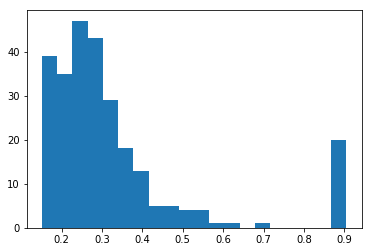

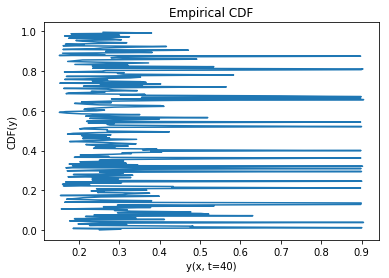

In [124]:
import matplotlib.pyplot as plt

sorted = np.sort(lcs[:, -1])   # sorted list of final val error
print(len(sorted))
h = plt.hist(sorted, bins=20)
plt.show()

yvals = np.arange(len(sorted))/float(len(sorted))   # from 0 to 1 in 265 even steps
plt.plot(sorted, yvals)
plt.title("Empirical CDF")
plt.xlabel("y(x, t=40)")
plt.ylabel("CDF(y)")
plt.show()

### Histogram and CDF over all error rates

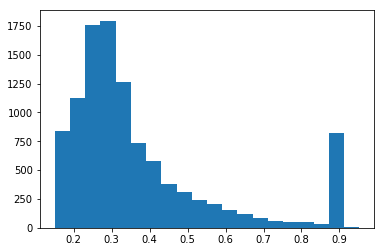

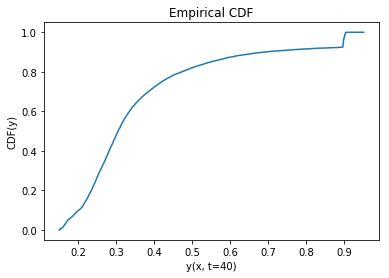

In [14]:
all_values = np.sort(learning_curves.flatten())

h = plt.hist(all_values, bins=20)
plt.show()

yvals = np.arange(all_values.shape[0])/all_values.shape[0]
plt.plot(all_values, yvals)
plt.title("Empirical CDF")
plt.xlabel("y(x, t=40)")
plt.ylabel("CDF(y)")
plt.show()